In [ ]:
!pip install numpy scikit-learn

In [ ]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, mutual_info_classif

texts = [
    "I study at Vellore Institute of Technology.",
    "I am pursuing a degree here in computer science and engineering.",
    "I have a cgpa of 9.42.",
    "My dog is the best in the world.",
    "VIT stands for Vellore Institute of Technology"
]

# irrelevant_features = ["dog", "cat"]

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(texts)

selector = SelectKBest(score_func=mutual_info_classif, k=2)
X_selected = selector.fit_transform(X, np.zeros(len(texts)))
selected_feature_indices = selector.get_support(indices=True)
selected_features = vectorizer.get_feature_names_out()[selected_feature_indices]

for i, text in enumerate(texts):
    relevant = True
    for feature in selected_features:
        if feature in text.lower():
            relevant = False
            break
    if relevant:
        print(f"'{text}' is relevant.")
    else:
        print(f"'{text}' is irrelevant.")


'I study at Vellore Institute of Technology.' is relevant.
'I am pursuing a degree here in computer science and engineering.' is relevant.
'I have a cgpa of 9.42.' is relevant.
'My dog is the best in the world.' is irrelevant.
'VIT stands for Vellore Institute of Technology' is irrelevant.


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.1

In [ ]:
# import torch
# from transformers import BertTokenizer, BertForSequenceClassification

# tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
# model = BertForSequenceClassification.from_pretrained('bert-base-uncased')

# text = "I study at Vellore Institute of Technology. I am pursuing a degree here in computer science and engineering. I have a cgpa of 9.42. My dog is the best in the world. VIT stands for Vellore Institute of Technology"

# inputs = tokenizer(text, return_tensors="pt")

# inputs['input_ids'].requires_grad = True

# outputs = model(**inputs)
# logits = outputs.logits

# dummy_target = torch.tensor([1])
# loss_fn = torch.nn.CrossEntropyLoss()
# loss = loss_fn(logits, dummy_target)

# loss.backward()

# saliency = inputs['input_ids'].grad.abs()

# irrelevant_tokens = (saliency < saliency.mean() + saliency.std()).nonzero(as_tuple=True)[1]

# purified_text_tokens = [token for idx, token in enumerate(tokenizer.convert_ids_to_tokens(inputs['input_ids'][0])) if idx not in irrelevant_tokens]
# purified_text = tokenizer.convert_tokens_to_string(purified_text_tokens)

# print(f"Original Text: {text}")
# print(f"Purified Text: {purified_text}")


In [ ]:
!pip install sentence_transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 2.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [ ]:
from sentence_transformers import SentenceTransformer, util
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

sentences = [
    "This is an example sentence.",
    "This is a similar sentence.",
    "This sentence is completely different.",
    "I am a good boy"
]

embeddings = model.encode(sentences, convert_to_tensor=True)
# scores = util.pytorch_cos_sim(embeddings, embeddings)
# print(scores)


tensor([[1.0000, 0.7436, 0.2920, 0.1387],
        [0.7436, 1.0000, 0.3297, 0.2011],
        [0.2920, 0.3297, 1.0000, 0.0205],
        [0.1387, 0.2011, 0.0205, 1.0000]])


In [ ]:
from sentence_transformers import SentenceTransformer, util
import numpy as np

model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

main_topic = "About me"

sentences = [
    "I am a good boy",
    "This is an example sentence.",
    "This sentence is relevant to the main topic.",
    "This sentence is completely different.",
    "Another relevant sentence regarding the main topic.",
    "Irrelevant information that doesn't fit the context."
]

main_topic_embedding = model.encode(main_topic, convert_to_tensor=True)
sentence_embeddings = model.encode(sentences, convert_to_tensor=True)

cosine_scores = util.pytorch_cos_sim(main_topic_embedding, sentence_embeddings)

threshold = 0.3

# Identify and print irrelevant sentences
irrelevant_sentences = []
for i, score in enumerate(cosine_scores[0]):
    if score < threshold:
        irrelevant_sentences.append((sentences[i], score.item()))

print("Irrelevant Sentences:")
for sentence, score in irrelevant_sentences:
    print(f"Sentence: {sentence}, Similarity Score: {score:.4f}")


Irrelevant Sentences:
Sentence: This is an example sentence., Similarity Score: 0.2374
Sentence: This sentence is relevant to the main topic., Similarity Score: 0.2634
Sentence: This sentence is completely different., Similarity Score: 0.0288
Sentence: Another relevant sentence regarding the main topic., Similarity Score: 0.2755
Sentence: Irrelevant information that doesn't fit the context., Similarity Score: -0.0259


In [ ]:
!pip install sentence_transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.3/245.3 kB 1.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
from sentence_transformers import SentenceTransformer, util
import torch

nltk.download('stopwords')
nltk.download('punkt')

data = [
    # "This is an example sentence about machine learning.",
    # "Bananas are yellow and tasty.",
    # "Machine learning models are used for predictions.",
    # "The weather today is sunny.",
    # "Deep learning is a subset of machine learning.",
    # "Cats are cute and playful."
    # "It is raining now",
    # "The weather looks good today",
    # "It might become hot at night today",
    # "My neck hurts today"
    # "I drank banana milkshake",
    # "The banana was very sweet",
    # "An apple was red",
    # "My neck hurts today"
    "Two people are walking near the two cars parked on the two way trunk road.",
    "Suddenly two more people joined and four are walking.",
    "two plus two makes four"
]

if len(data) < 3 :
  print("We need a minimum of 3 sentences to derive context from the given text")
  exit()
def preprocess_text(text):
    text = re.sub(r'\W', ' ', text)
    text = text.lower()
    tokens = word_tokenize(text)
    # tokens = [word for word in tokens if word not in stopwords.words('english')]
    tokens1 = []
    for i in tokens:
      if i not in stopwords.words('english'):
        tokens1.append(i)

    return ' '.join(tokens1)

cleaned_data = []
for sentence in data:
  cleaned_data.append(preprocess_text(sentence))

model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

embeddings = model.encode(cleaned_data, convert_to_tensor=True)
central_theme_embedding = torch.mean(embeddings, dim=0)

similarity_scores = []
for embedding in embeddings:
  similarity_scores.append(util.pytorch_cos_sim(embedding, central_theme_embedding).item())

# similarity_scores =[]
threshold = 0.65
irrelevant_sentences = []

for i, score in enumerate(similarity_scores):
  if score < threshold:
    irrelevant_sentences.append(data[i])

print("Irrelevant Sentences in the given text are:")
print(irrelevant_sentences)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Irrelevant Sentences in the given text are:
['two plus two makes four']


In [ ]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer("all-mpnet-base-v2")
embeddings = model.encode([
    "The weather is lovely today.",
    "It's so sunny outside!",
    "He drove to the stadium.",
])
print(embeddings)

# print(len(embeddings[0]))
# similarities = model.similarity(embeddings, embeddings)
# print(similarities)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


[[-0.05405933 -0.01718496 -0.0355374  ...  0.0212681   0.04306811
  -0.01077992]
 [-0.06346928 -0.03161849 -0.01481565 ...  0.03250144 -0.02075414
   0.00200077]
 [-0.0390255   0.03801633  0.00174589 ... -0.01257588 -0.0598295
  -0.04102633]]
768


Comparing every sentence with every other sentence, irrelevant sentences are those that are distant from every other sentence

In [ ]:

import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
from sentence_transformers import SentenceTransformer, util
import torch

nltk.download('stopwords')
nltk.download('punkt')

data = [
    # "This is an example sentence about machine learning.",
    # "Bananas are yellow and tasty.",
    # "Machine learning models are used for predictions.",
    # "The weather today is sunny.",
    # "Deep learning is a subset of machine learning.",
    # "Cats are cute and playful."
    # "It is raining now",
    # "The weather looks good today",
    # "It might become hot at night today",
    # "My neck hurts today"
    # "I drank banana milkshake",
    # "The banana was very sweet",
    # "An apple was red",
    # "My neck hurts today"
    "Two people are walking near the two cars parked on the two way trunk road.",
    "Suddenly two more people joined and four are walking.",
    "two plus two makes four"
]

if len(data) < 3 :
  print("We need a minimum of 3 sentences to derive context from the given text")
  exit()
def preprocess_text(text):
    text = re.sub(r'\W', ' ', text)
    text = text.lower()
    tokens = word_tokenize(text)
    # tokens = [word for word in tokens if word not in stopwords.words('english')]
    tokens1 = []
    for i in tokens:
      if i not in stopwords.words('english'):
        tokens1.append(i)

    return ' '.join(tokens1)

cleaned_data = []
for sentence in data:
  cleaned_data.append(preprocess_text(sentence))

model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

embeddings = model.encode(cleaned_data, convert_to_tensor=True)
central_theme_embedding = torch.mean(embeddings, dim=0)

similarity_scores = []
for embedding in embeddings:
  similarity_scores.append(util.pytorch_cos_sim(embedding, central_theme_embedding).item())

# similarity_scores =[]
threshold = 0.65
irrelevant_sentences = []

for i, score in enumerate(similarity_scores):
  if score < threshold:
    irrelevant_sentences.append(data[i])

print("Irrelevant Sentences in the given text are:")
print(irrelevant_sentences)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Irrelevant Sentences in the given text are:
['two plus two makes four']



GENERALISING THRESHOLD




In [ ]:
# !pip install sentence_transformers
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
from sentence_transformers import SentenceTransformer, util
import torch
import numpy as np

nltk.download('stopwords')
nltk.download('punkt')
def calculate_threshold(similarity_scores, text_length):
    # Statistical approach
    mean_similarity = sum(similarity_scores) / len(similarity_scores)
    std_dev = (sum((x - mean_similarity) ** 2 for x in similarity_scores) / len(similarity_scores)) ** 0.5
    stat_threshold = mean_similarity - 1.5 * std_dev

    # Percentile approach
    percentile_threshold = np.percentile(similarity_scores, 10)

    # Adjust based on text length
    length_factor = min(1, text_length / 1000)  # Normalize for texts up to 1000 words

    # Combine methods
    threshold = (stat_threshold + percentile_threshold) / 2
    threshold = threshold * (1 - length_factor) + percentile_threshold * length_factor

    return threshold

data = [
    # "This is an example sentence about machine learning.",
    # "Bananas are yellow and tasty.",
    # "Machine learning models are used for predictions.",
    # "The weather today is sunny.",
    # "Deep learning is a subset of machine learning.",
    # "Cats are cute and playful."
    # "It is raining now",
    # "The weather looks good today",
    # "It might become hot at night today",
    # "My neck hurts today"
    # "I drank banana milkshake",
    # "The banana was very sweet",
    # "An apple was red",
    # "My neck hurts today"
    # "Two people are walking near the two cars parked on the two way trunk road.",
    # "Suddenly two more people joined and four are walking.",
    # "two plus two makes four"
    "Climate change refers to significant changes in global temperatures and weather patterns over time.",
"The rise in greenhouse gas emissions is a major contributor to global warming.",
"Melting polar ice caps are causing sea levels to rise, which can lead to coastal flooding.",
    # "My favorite color is blue because it's calming."
    "I enjoy hiking in the mountains on weekends."

]

if len(data) < 3 :
  print("We need a minimum of 3 sentences to derive context from the given text")
  exit()
def preprocess_text(text):
    text = re.sub(r'\W', ' ', text)
    text = text.lower()
    tokens = word_tokenize(text)
    # tokens = [word for word in tokens if word not in stopwords.words('english')]
    tokens1 = []
    for i in tokens:
      if i not in stopwords.words('english'):
        tokens1.append(i)

    return ' '.join(tokens1)

cleaned_data = []
for sentence in data:
  cleaned_data.append(preprocess_text(sentence))

model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

embeddings = model.encode(cleaned_data, convert_to_tensor=True)
central_theme_embedding = torch.mean(embeddings, dim=0)

similarity_scores = []
for embedding in embeddings:
  similarity_scores.append(util.pytorch_cos_sim(embedding, central_theme_embedding).item())


# Usage
text_length = sum(len(sentence.split()) for sentence in data)
threshold = calculate_threshold(similarity_scores, text_length)
irrelevant_sentences = []

for i, score in enumerate(similarity_scores):
  if score < threshold:
    irrelevant_sentences.append(data[i])

print("Irrelevant Sentences in the given text are:")
print(irrelevant_sentences)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Irrelevant Sentences in the given text are:
[]


In [ ]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def calculate_relevance_scores(sentences):
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(sentences)
    cosine_similarities = cosine_similarity(tfidf_matrix, tfidf_matrix)

    relevance_scores = []
    for i in range(len(sentences)):
        other_similarities = np.concatenate([cosine_similarities[i][:i], cosine_similarities[i][i+1:]])
        relevance_scores.append(np.mean(other_similarities))

    return relevance_scores

def identify_irrelevant_sentences(sentences, relevance_scores):
    if len(sentences) <= 3:
        min_score_index = relevance_scores.index(min(relevance_scores))
        return [sentences[min_score_index]]
    else:
        mean_score = np.mean(relevance_scores)
        std_dev = np.std(relevance_scores)
        threshold = mean_score - 1.5 * std_dev
        return [sentences[i] for i, score in enumerate(relevance_scores) if score < threshold]

sentences1 = [
    "Two people are walking near the two cars parked on the two way trunk road.",
    "Suddenly two more people joined and four are walking.",
    "two plus two makes four"
]

sentences2 = [
    "Climate change refers to significant changes in global temperatures and weather patterns over time.",
    "The rise in greenhouse gas emissions is a major contributor to global warming.",
    "Melting polar ice caps are causing sea levels to rise, which can lead to coastal flooding.",
    "My favorite color is blue because it's calming."
]

for sentences in [sentences1, sentences2]:
    relevance_scores = calculate_relevance_scores(sentences)
    irrelevant_sentences = identify_irrelevant_sentences(sentences, relevance_scores)
    print("\nSentences:", sentences)
    print("Relevance scores:", relevance_scores)
    print("Irrelevant sentences:", irrelevant_sentences)


Sentences: ['Two people are walking near the two cars parked on the two way trunk road.', 'Suddenly two more people joined and four are walking.', 'two plus two makes four']
Relevance scores: [0.2670006733124849, 0.25924214498661147, 0.25576038278309077]
Irrelevant sentences: ['two plus two makes four']

Sentences: ['Climate change refers to significant changes in global temperatures and weather patterns over time.', 'The rise in greenhouse gas emissions is a major contributor to global warming.', 'Melting polar ice caps are causing sea levels to rise, which can lead to coastal flooding.', "My favorite color is blue because it's calming."]
Relevance scores: [0.06873322822398754, 0.11201836122631043, 0.05853232266021838, 0.023860559116679725]
Irrelevant sentences: []


# SENTENCE-TO-SENTENCE COMPARISON





In [ ]:
!pip install sentence_transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 1.8 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

COMPARISON OF AVERAGE SIMILARITIES

In [ ]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
from sentence_transformers import SentenceTransformer, util
import torch
import numpy as np

nltk.download('stopwords')
nltk.download('punkt')

data = [
    # "Two people are walking near the two cars parked on the two way trunk road.",
    # "Suddenly two more people joined and four are walking.",
    # "two plus two makes four"
    "Climate change refers to significant changes in global temperatures and weather patterns over time.",
"The rise in greenhouse gas emissions is a major contributor to global warming.",
"Melting polar ice caps are causing sea levels to rise, which can lead to coastal flooding.",
    # "My favorite color is blue because it's calming.",
    # "The sky is blue in colour and the weather is good today",
    "Bangalore's weather is very good throughout the year"
]

if len(data) < 3:
    print("We need a minimum of 3 sentences to derive context from the given text")
    exit()

def preprocess_text(text):
    text = re.sub(r'\W', ' ', text)
    text = text.lower()
    tokens = word_tokenize(text)
    tokens1 = [i for i in tokens if i not in stopwords.words('english')]
    return ' '.join(tokens1)

cleaned_data = [preprocess_text(sentence) for sentence in data]

model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

embeddings = model.encode(cleaned_data, convert_to_tensor=True)

similarity_matrix = util.pytorch_cos_sim(embeddings, embeddings).cpu().numpy()
# print(similarity_matrix)

avg_similarities = np.mean(similarity_matrix, axis=1)

threshold = np.mean(avg_similarities) - np.std(avg_similarities)
print(threshold)

irrelevant_indices = np.where(avg_similarities < threshold)[0]
irrelevant_sentences = [data[i] for i in irrelevant_indices]

print("Similarity Matrix:")
print(similarity_matrix)
print("\nAverage Similarities:")
print(avg_similarities)
print("\nIrrelevant Sentences in the given text are:")
print(irrelevant_sentences)

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or data

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.73k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

0.4175855
Similarity Matrix:
[[0.9999998  0.5537765  0.42747754 0.37866896]
 [0.5537765  1.         0.27966356 0.22194783]
 [0.42747754 0.27966356 1.         0.04067817]
 [0.37866896 0.22194783 0.04067817 0.99999994]]

Average Similarities:
[0.5899807  0.513847   0.43695483 0.41032374]

Irrelevant Sentences in the given text are:
["Bangalore's weather is very good throughout the year"]


TRYING OUT THRESHOLD VALUES

In [ ]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
from sentence_transformers import SentenceTransformer, util
import torch
import numpy as np

nltk.download('stopwords')
nltk.download('punkt')

data = [
    # "Two people are walking near the two cars parked on the two way trunk road.",
    # "Suddenly two more people joined and four are walking.",
    # "two plus two makes four"
    # "The quick brown fox jumps over the lazy dog.",
    # "The concert last night featured an amazing performance by the jazz band.",
    # "The recipe calls for two cups of flour and one teaspoon of baking powder."
    "Rising global temperatures are causing more frequent and severe weather events such as hurricanes and heatwaves.",
    "The melting of polar ice caps is contributing to rising sea levels, which threaten coastal communities worldwide.",
    "Reducing carbon emissions is essential to mitigate the impacts of climate change and protect the environment for future generations."
]

if len(data) < 3:
    print("We need a minimum of 3 sentences to derive context from the given text")
    exit()

def preprocess_text(text):
    text = re.sub(r'\W', ' ', text)
    text = text.lower()
    tokens = word_tokenize(text)
    tokens1 = [i for i in tokens if i not in stopwords.words('english')]
    return ' '.join(tokens1)

cleaned_data = [preprocess_text(sentence) for sentence in data]

model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

embeddings = model.encode(cleaned_data, convert_to_tensor=True)

similarity_matrix = util.pytorch_cos_sim(embeddings, embeddings).cpu().numpy()

# threshold = 0.25
threshold = np.std(similarity_matrix)
print(threshold)

irrelevant_sentences = []
# for i, sentence in enumerate(data):
#     is_irrelevant = True
#     for j, score in enumerate(similarity_matrix[i]):
#         if i != j and score >= threshold:
#             is_irrelevant = False
#             break
#     if is_irrelevant:
#         irrelevant_sentences.append(sentence)

index = 0
for i in similarity_matrix:
    count = 0
    for j in i:
        if j <= threshold:
            count += 1
    if count > len(similarity_matrix) / 2:
        print(i)
        irrelevant_sentences.append(data[index])
    index += 1

print("Similarity Matrix:")
print(similarity_matrix)
print("\nIrrelevant Sentences in the given text are:")
print(irrelevant_sentences)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


0.3177863
[0.27523565 0.31778285 0.99999994]
Similarity Matrix:
[[1.         0.4037744  0.27523565]
 [0.40377438 1.         0.31778288]
 [0.27523565 0.31778285 0.99999994]]

Irrelevant Sentences in the given text are:
['Reducing carbon emissions is essential to mitigate the impacts of climate change and protect the environment for future generations.']


COMPARISON OF INDIVIDUAL SIMILARITY SCORES

In [ ]:
# !pip install sentence_transformers

import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
from sentence_transformers import SentenceTransformer, util
import torch
import numpy as np

nltk.download('stopwords')
nltk.download('punkt')

data = [
    # "Two people are walking near the two cars parked on the two way trunk road.",
    # "Suddenly two more people joined and four are walking.",
    # "two plus two makes four"
    # "The quick brown fox jumps over the lazy dog.",
    # "The concert last night featured an amazing performance by the jazz band.",
    # "The recipe calls for two cups of flour and one teaspoon of baking powder."
    "Rising global temperatures are causing more frequent and severe weather events such as hurricanes and heatwaves.",
    "The melting of polar ice caps is contributing to rising sea levels, which threaten coastal communities worldwide.",
    "Reducing carbon emissions is essential to mitigate the impacts of climate change and protect the environment for future generations."
]

if len(data) < 3:
    print("We need a minimum of 3 sentences to derive context from the given text")
    exit()

def preprocess_text(text):
    text = re.sub(r'\W', ' ', text)
    text = text.lower()
    tokens = word_tokenize(text)
    tokens1 = [i for i in tokens if i not in stopwords.words('english')]
    return ' '.join(tokens1)

cleaned_data = [preprocess_text(sentence) for sentence in data]

model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

embeddings = model.encode(cleaned_data, convert_to_tensor=True)

similarity_matrix = util.pytorch_cos_sim(embeddings, embeddings).cpu().numpy()

threshold = 0.25

irrelevant_sentences = []
# for i, sentence in enumerate(data):
#     is_irrelevant = True
#     for j, score in enumerate(similarity_matrix[i]):
#         if i != j and score >= threshold:
#             is_irrelevant = False
#             break
#     if is_irrelevant:
#         irrelevant_sentences.append(sentence)

index = 0
for i in similarity_matrix:
    count = 0
    for j in i:
        if j <= threshold:
            count += 1
    if count > len(similarity_matrix) / 2:
        print(i)
        irrelevant_sentences.append(data[index])
    index += 1

print("Similarity Matrix:")
print(similarity_matrix)
print("\nIrrelevant Sentences in the given text are:")
print(irrelevant_sentences)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Similarity Matrix:
[[1.         0.4037744  0.27523565]
 [0.40377438 1.         0.31778288]
 [0.27523565 0.31778285 0.99999994]]

Irrelevant Sentences in the given text are:
[]


Testing out different inputs

In [ ]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
from sentence_transformers import SentenceTransformer, util
import torch
import numpy as np

nltk.download('stopwords')
nltk.download('punkt')

data = [
    "Two people are walking near the two cars parked on the two way trunk road.",
    "Suddenly two more people joined and four are walking.",
    "two plus two makes four"
    # "The quick brown fox jumps over the lazy dog.",
    # "The concert last night featured an amazing performance by the jazz band.",
    # "The recipe calls for two cups of flour and one teaspoon of baking powder."
    # ions."
]

if len(data) < 3:
    print("We need a minimum of 3 sentences to derive context from the given text")
    exit()

def preprocess_text(text):
    text = re.sub(r'\W', ' ', text)
    text = text.lower()
    tokens = word_tokenize(text)
    tokens1 = [i for i in tokens if i not in stopwords.words('english')]
    return ' '.join(tokens1)

cleaned_data = [preprocess_text(sentence) for sentence in data]

model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

embeddings = model.encode(cleaned_data, convert_to_tensor=True)

similarity_matrix = util.pytorch_cos_sim(embeddings, embeddings).cpu().numpy()

threshold = 0.25

irrelevant_sentences = []
# for i, sentence in enumerate(data):
#     is_irrelevant = True
#     for j, score in enumerate(similarity_matrix[i]):
#         if i != j and score >= threshold:
#             is_irrelevant = False
#             break
#     if is_irrelevant:
#         irrelevant_sentences.append(sentence)

index = 0
for i in similarity_matrix:
    count = 0
    for j in i:
        if j <= threshold:
            count += 1
    if count > len(similarity_matrix) / 2:
        print(i)
        irrelevant_sentences.append(data[index])
    index += 1

print("Similarity Matrix:")
print(similarity_matrix)
print("\nIrrelevant Sentences in the given text are:")
print(irrelevant_sentences)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[0.07099936 0.2442277  1.        ]
Similarity Matrix:
[[1.0000001  0.380352   0.07099936]
 [0.38035196 0.9999999  0.2442277 ]
 [0.07099936 0.2442277  1.        ]]

Irrelevant Sentences in the given text are:
['two plus two makes four']



All sentences are irrelevant

In [ ]:
!pip install sentence_transformers

  Using cached sentence_transformers-3.0.1-py3-none-any.whl (227 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86

In [ ]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
from sentence_transformers import SentenceTransformer, util
import torch
import numpy as np

nltk.download('stopwords')
nltk.download('punkt')

data = [
    # "Two people are walking near the two cars parked on the two way trunk road.",
    # "Suddenly two more people joined and four are walking.",
    # "two plus two makes four"

    # "The quick brown fox jumps over the lazy dog.",
    # "The concert last night featured an amazing performance by the jazz band.",
    # "The recipe calls for two cups of flour and one teaspoon of baking powder."

    "Delhi is not the capital of India",
    "Mumbai is not the capital of India",
    "The weather is good in New Delhi today",
    "Delhi is the capital of India"
]

if len(data) < 3:
    print("We need a minimum of 3 sentences to derive context from the given text")
    exit()

def preprocess_text(text):
    text = re.sub(r'\W', ' ', text)
    text = text.lower()
    tokens = word_tokenize(text)
    # tokens1 = [i for i in tokens if i not in stopwords.words('english')]
    return ' '.join(tokens)

cleaned_data = [preprocess_text(sentence) for sentence in data]

model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

embeddings = model.encode(cleaned_data, convert_to_tensor=True)

similarity_matrix = util.pytorch_cos_sim(embeddings, embeddings).cpu().numpy()

threshold = 0.25

irrelevant_sentences = []
# for i, sentence in enumerate(data):
#     is_irrelevant = True
#     for j, score in enumerate(similarity_matrix[i]):
#         if i != j and score >= threshold:
#             is_irrelevant = False
#             break
#     if is_irrelevant:
#         irrelevant_sentences.append(sentence)

index = 0
for i in similarity_matrix:
    count = 0
    for j in i:
        if j <= threshold:
            count += 1
    if count > len(similarity_matrix) / 2:
        print(i)
        irrelevant_sentences.append(data[index])
    index += 1

print("Similarity Matrix:")
print(similarity_matrix)
print("\nIrrelevant Sentences in the given text are:")
print(irrelevant_sentences)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Similarity Matrix:
[[1.         0.86981523 0.41044617 0.77065665]
 [0.86981523 1.         0.24134552 0.63329303]
 [0.41044617 0.24134552 1.0000001  0.57729274]
 [0.77065665 0.63329303 0.57729274 0.9999999 ]]

Irrelevant Sentences in the given text are:
[]


All sentences relevant

In [ ]:
!pip install sentence_transformers

import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
from sentence_transformers import SentenceTransformer, util
import torch
import numpy as np

nltk.download('stopwords')
nltk.download('punkt')

data = [
    # "Two people are walking near the two cars parked on the two way trunk road.",
    # "Suddenly two more people joined and four are walking.",
    # "two plus two makes four"
    # "The quick brown fox jumps over the lazy dog.",
    # "The concert last night featured an amazing performance by the jazz band.",
    # "The recipe calls for two cups of flour and one teaspoon of baking powder."
    # "Rising global temperatures are causing more frequent and severe weather events such as hurricanes and heatwaves.",
    # "The melting of polar ice caps is contributing to rising sea levels, which threaten coastal communities worldwide.",
    # "Reducing carbon emissions is essential to mitigate the impacts of climate change and protect the environment for future generations."

    # "Rising global temperatures are causing more frequent and severe weather events such as hurricanes and heatwaves.",
    # "The melting of polar ice caps is contributing to rising sea levels, which threaten coastal communities worldwide.",
    # "Reducing carbon emissions is essential to mitigate the impacts of climate change and protect the environment for future generations.",
    # "The quick brown fox jumps over the lazy dog.",
    # "The concert last night featured an amazing performance by the jazz band.",
    # "The recipe calls for two cups of flour and one teaspoon of baking powder."

    # "All banks are not banks to transact money.",
    # "Some banks bank on the reputation of the bank.",
    # "Money is spent like water."

    "Delhi is not the capital of India",
    "Mumbai is not the capital of India",
    "The weather is good in New Delhi today",
    "Delhi is the capital of India"
]

if len(data) < 3:
    print("We need a minimum of 3 sentences to derive context from the given text")
    exit()

def preprocess_text(text):
    text = re.sub(r'\W', ' ', text)
    text = text.lower()
    tokens = word_tokenize(text)
    tokens1 = [i for i in tokens if i not in stopwords.words('english')]
    return ' '.join(tokens1)

cleaned_data = [preprocess_text(sentence) for sentence in data]

model = SentenceTransformer('all-mpnet-base-v2')

embeddings = model.encode(cleaned_data, convert_to_tensor=True)

similarity_matrix = util.pytorch_cos_sim(embeddings, embeddings).cpu().numpy()

threshold = 0.25

irrelevant_sentences = []
# for i, sentence in enumerate(data):
#     is_irrelevant = True
#     for j, score in enumerate(similarity_matrix[i]):
#         if i != j and score >= threshold:
#             is_irrelevant = False
#             break
#     if is_irrelevant:
#         irrelevant_sentences.append(sentence)

index = 0
for i in similarity_matrix:
    count = 0
    for j in i:
        if j <= threshold:

            count += 1
    if count > len(similarity_matrix) / 2:
        print(i)
        irrelevant_sentences.append(data[index])
    index += 1

print("Similarity Matrix:")
print(similarity_matrix)
print("\nIrrelevant Sentences in the given text are:")
print(irrelevant_sentences)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 1.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
ERROR: Operation cancelled by user


ModuleNotFoundError: No module named 'sentence_transformers'

CONCLUSION : THE BEST PRETRAINED MODELS OF SENTENCE TRANSFORMERS ARE "all-mpnet-base-v2" and "paraphrase-MiniLM-L6-v2"

In [ ]:
!pip install sentence_transformers

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [ ]:
# !pip install sentence_transformers

import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
from sentence_transformers import SentenceTransformer, util
import torch
import numpy as np

nltk.download('stopwords')
nltk.download('punkt')

data = [
    # "Two people are walking near the two cars parked on the two way trunk road.",
    # "Suddenly two more people joined and four are walking.",
    # "two plus two makes four"
    "The quick brown fox jumps over the lazy dog.",
    # "The concert last night featured an amazing performance by the jazz band.",
    # "The recipe calls for two cups of flour and one teaspoon of baking powder."
    "Rising global temperatures are causing more frequent and severe weather events such as hurricanes and heatwaves.",
    "The melting of polar ice caps is contributing to rising sea levels, which threaten coastal communities worldwide.",
    "Reducing carbon emissions is essential to mitigate the impacts of climate change and protect the environment for future generations."
]

if len(data) < 3:
    print("We need a minimum of 3 sentences to derive context from the given text")
    exit()

def preprocess_text(text):
    text = re.sub(r'\W', ' ', text)
    text = text.lower()
    tokens = word_tokenize(text)
    tokens1 = [i for i in tokens if i not in stopwords.words('english')]
    return ' '.join(tokens1)

cleaned_data = [preprocess_text(sentence) for sentence in data]

model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

embeddings = model.encode(cleaned_data, convert_to_tensor=True)

similarity_matrix = util.pytorch_cos_sim(embeddings, embeddings).cpu().numpy()

threshold = 0.25

irrelevant_sentences = []
# for i, sentence in enumerate(data):
#     is_irrelevant = True
#     for j, score in enumerate(similarity_matrix[i]):
#         if i != j and score >= threshold:
#             is_irrelevant = False
#             break
#     if is_irrelevant:
#         irrelevant_sentences.append(sentence)

index = 0
for i in similarity_matrix:
    count = 0
    for j in i:
        if j <= threshold:
            count += 1
    if count > len(similarity_matrix) / 2:
        print(i)
        irrelevant_sentences.append(data[index])
    index += 1

print("Similarity Matrix:")
print(similarity_matrix)
print("\nIrrelevant Sentences in the given text are by just comparing them individually is:")
print(irrelevant_sentences)
print("\n")

from sklearn.cluster import DBSCAN

# DBSCAN parameters: eps is the max distance for two samples to be considered as in the same neighborhood
# min_samples is the number of samples in a neighborhood for a point to be considered a core point
dbscan = DBSCAN(eps=0.1, min_samples=2, metric='cosine')

# Fit the model and get cluster labels
cluster_labels = dbscan.fit_predict(embeddings.cpu().numpy())

# Identify noise points (label = -1)
noise_indices = np.where(cluster_labels == -1)[0]
irrelevant_sentences_dbscan = [data[i] for i in noise_indices]

print("\nIrrelevant Sentences based on DBSCAN Clustering:")
print(irrelevant_sentences_dbscan)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[ 1.         -0.0558415  -0.22010842 -0.10638286]
Similarity Matrix:
[[ 1.         -0.0558415  -0.22010842 -0.10638286]
 [-0.0558415   0.9999999   0.40377432  0.2752356 ]
 [-0.22010842  0.40377432  1.0000002   0.31778282]
 [-0.10638286  0.2752356   0.31778282  1.0000002 ]]

Irrelevant Sentences in the given text are by just comparing them individually is:
['The quick brown fox jumps over the lazy dog.']



Irrelevant Sentences based on DBSCAN Clustering:
['The quick brown fox jumps over the lazy dog.', 'Rising global temperatures are causing more frequent and severe weather events such as hurricanes and heatwaves.', 'The melting of polar ice caps is contributing to rising sea levels, which threaten coastal communities worldwide.', 'Reducing carbon emissions is essential to mitigate the impacts of climate change and protect the environment for future generations.']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Similarity Matrix:
[[1.0000001  0.79334533 0.29813153 0.6010448 ]
 [0.79334533 1.         0.44785687 0.8752073 ]
 [0.29813153 0.44785687 1.0000001  0.5187788 ]
 [0.6010448  0.8752073  0.5187788  0.9999998 ]]

Irrelevant Sentences in the given text are by just comparing them individually is:
[]




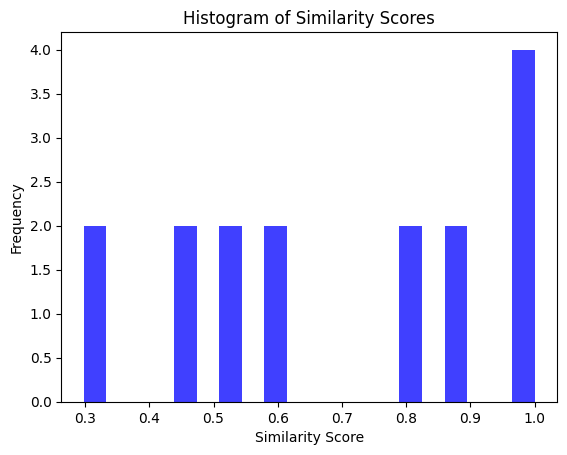

In [ ]:

import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
from sentence_transformers import SentenceTransformer, util
import torch
import numpy as np

nltk.download('stopwords')
nltk.download('punkt')

data = [
    # "Two people are walking near the two cars parked on the two way trunk road.",
    # "Suddenly two more people joined and four are walking.",
    # "two plus two makes four"
    # "The quick brown fox jumps over the lazy dog.",
    # "The concert last night featured an amazing performance by the jazz band.",
    # "The recipe calls for two cups of flour and one teaspoon of baking powder."
    # "Rising global temperatures are causing more frequent and severe weather events such as hurricanes and heatwaves.",
    # "The melting of polar ice caps is contributing to rising sea levels, which threaten coastal communities worldwide.",
    # "Reducing carbon emissions is essential to mitigate the impacts of climate change and protect the environment for future generations."
    "Mumbai is not the capital of India",
    "Delhi is not the capital of India",
    "The weather is good in New Delhi today",
    "Delhi is the capital of India"
]

if len(data) < 3:
    print("We need a minimum of 3 sentences to derive context from the given text")
    exit()

def preprocess_text(text):
    text = re.sub(r'\W', ' ', text)
    text = text.lower()
    tokens = word_tokenize(text)
    return ' '.join(tokens)
    # tokens1 = [i for i in tokens if i not in stopwords.words('english')]
    # return ' '.join(tokens1)

cleaned_data = [preprocess_text(sentence) for sentence in data]

model = SentenceTransformer('all-mpnet-base-v2')

embeddings = model.encode(cleaned_data, convert_to_tensor=True)

similarity_matrix = util.pytorch_cos_sim(embeddings, embeddings).cpu().numpy()

threshold = 0.25

irrelevant_sentences = []
# for i, sentence in enumerate(data):
#     is_irrelevant = True
#     for j, score in enumerate(similarity_matrix[i]):
#         if i != j and score >= threshold:
#             is_irrelevant = False
#             break
#     if is_irrelevant:
#         irrelevant_sentences.append(sentence)

index = 0
for i in similarity_matrix:
    count = 0
    for j in i:
        if j <= threshold:
            count += 1
    if count > len(similarity_matrix) / 2:
        print(i)
        irrelevant_sentences.append(data[index])
    index += 1

print("Similarity Matrix:")
print(similarity_matrix)
print("\nIrrelevant Sentences in the given text are by just comparing them individually is:")
print(irrelevant_sentences)
print("\n")

# similarities = similarity_matrix
# Calculate the mean and standard deviation of the similarity scores
# mean_similarity = np.mean(similarities)
# std_similarity = np.std(similarities)

# # Compute the Z-score for each similarity score
# z_scores = (similarities - mean_similarity) / std_similarity

# # Determine a threshold based on Z-scores (e.g., Z < -1)
# z_threshold = -1

# irrelevant_indices = np.where(z_scores < z_threshold)[0]
# irrelevant_sentences_z = [data[i] for i in irrelevant_indices]

# print("\nIrrelevant Sentences based on Z-Score Normalization:")
# print(irrelevant_sentences_z)

# histogram

import matplotlib.pyplot as plt

# Flatten the similarity matrix to get all pairwise similarities
similarities = similarity_matrix.flatten()

# Plot histogram of similarity scores
plt.hist(similarities, bins=20, alpha=0.75, color='blue')
plt.xlabel('Similarity Score')
plt.ylabel('Frequency')
plt.title('Histogram of Similarity Scores')
plt.show()


In [ ]:
!pip install sentence_transformers

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [ ]:
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sentence_transformers import SentenceTransformer, util

nltk.download('stopwords')
nltk.download('punkt')

data = [
    # "Rising global temperatures are causing more frequent and severe weather events.",
    # "The melting of polar ice caps is contributing to rising sea levels.",
    # "Reducing carbon emissions is essential to mitigate climate change.",
    # "The quick brown fox jumps over the lazy dog.",
    # "The concert last night featured an amazing performance by the jazz band.",
    # "The recipe calls for two cups of flour and one teaspoon of baking powder."
    # "The weather is good today."
    # "Two people are walking near the two cars parked on the two way trunk road.",
    # "Suddenly two more people joined and four are walking.",
    # "two plus two makes four."
    # "An operating system manages hardware resources and provides services for application software, ensuring efficient operation of a computer.",
    # "It handles process scheduling, which involves deciding the order in which processes will execute, optimizing CPU utilization and system responsiveness.",
    # "Virtual memory, another key feature, allows an operating system to use disk space to simulate additional RAM, enabling the execution of large applications with limited physical memory.",
    # "Meanwhile, in the broader field of computer science, data structures such as arrays, linked lists, and trees are fundamental concepts crucial for efficiently organizing and manipulating data.",
    # "Network security is very important.",
    # "The operating system's kernel acts as an intermediary between the hardware and software, managing system resources and facilitating communication between components."
    # "File systems in operating systems organize and manage data storage, providing a way for users and applications to access files and directories efficiently.",
    # "Networking capabilities in operating systems enable computers to communicate over various types of networks, supporting protocols and security measures for data exchange."

    # "Memory management in an operating system includes allocating and deallocating memory space as needed by programs, ensuring efficient use of system resources.",
    # "Operating systems provide a user interface, often graphical, that allows users to interact with the system and manage files, applications, and settings.",
    "Security features in OS help protect the system from unauthorized access and malware, ensuring data integrity and privacy.",

    "OS provides a platform for application execution.",
    "In a theater, a stage 'manager' coordinates the performers and crew.",
    "OS scheduling algorithms optimize CPU time among tasks."
    ]

def preprocess_text(text):
    text = re.sub(r'\W', ' ', text)
    text = text.lower()
    tokens = word_tokenize(text)
    # tokens = [word for word in tokens if word not in stopwords.words('english')]
    return ' '.join(tokens)

cleaned_data = [preprocess_text(sentence) for sentence in data]
model = SentenceTransformer('all-mpnet-base-v2')
embeddings = model.encode(cleaned_data, convert_to_tensor=True)

similarity_matrix = util.pytorch_cos_sim(embeddings, embeddings).cpu().numpy()

similarities = similarity_matrix.flatten()
mean_similarity = np.mean(similarities)
std_similarity = np.std(similarities)

best_k = None
best_score = -np.inf
for k in np.arange(0.5, 3.0, 0.1):
    threshold = mean_similarity - k * std_similarity
    irrelevant_indices = []
    for i, row in enumerate(similarity_matrix):
        max_similarity = max(row[j] for j in range(len(row)) if i != j)
        if max_similarity < threshold:
            irrelevant_indices.append(i)
    # relevant_indices = set(range(len(data))) - set(irrelevant_indices)
    relevant_indices = set()
    for i in range(len(data)):
        if i not in irrelevant_indices:
            relevant_indices.add(i)

    if len(relevant_indices) > 0:
        score = np.mean([np.mean(similarity_matrix[i][list(relevant_indices)]) for i in relevant_indices])
        if score > best_score:
            best_score = score
            best_k = k

print(f"Optimal k: {best_k}")
k = best_k
threshold = mean_similarity - k * std_similarity

irrelevant_indices = []

for i in range(len(similarity_matrix)):
    count = 0
    for j in range(len(similarity_matrix[i])):
        if i != j and similarity_matrix[i][j] <= threshold:
            count += 1

    if len(data) <= 3:
      if count >= (len(similarity_matrix) - 1 )/ 2:
          irrelevant_indices.append(i)
            # break
    else:
      if count > (len(similarity_matrix)) / 2:
              irrelevant_indices.append(i)
              # break

irrelevant_sentences = [data[i] for i in irrelevant_indices]

print("Similarity Matrix:\n", similarity_matrix)
print("\nThreshold:", threshold)
print("\nIrrelevant Sentences:\n", irrelevant_sentences)


/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or data

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Optimal k: 0.5
Similarity Matrix:
 [[1.         0.5574974  0.09641848 0.26421604]
 [0.5574974  0.9999999  0.15733536 0.48413655]
 [0.09641848 0.15733536 1.0000004  0.12952808]
 [0.26421604 0.48413655 0.12952808 1.        ]]

Threshold: 0.28752027451992035

Irrelevant Sentences:
 ["In a theater, a stage 'manager' coordinates the performers and crew."]


In [ ]:
import numpy as np
from sentence_transformers import SentenceTransformer, util

data = [
    # "Rising global temperatures are causing more frequent and severe weather events.",
    # "The melting of polar ice caps is contributing to rising sea levels.",
    # "Reducing carbon emissions is essential to mitigate climate change."
    # "Two people are walking near the two cars parked on the two way trunk road.",
    # "Suddenly two more people joined and four are walking.",
    # "two plus two makes four."

    #operating systems
    # "An operating system manages hardware resources and provides services for application software, ensuring efficient operation of a computer.",
    # "It handles process scheduling, which involves deciding the order in which processes will execute, optimizing CPU utilization and system responsiveness.",
    # "Virtual memory, another key feature, allows an operating system to use disk space to simulate additional RAM, enabling the execution of large applications with limited physical memory.",
    # "Meanwhile, in the broader field of computer science, data structures such as arrays, linked lists, and trees are fundamental concepts crucial for efficiently organizing and manipulating data."

    "Meanwhile, in the broader field of computer science, data structures such as arrays, linked lists, and trees are fundamental concepts crucial for efficiently organizing and manipulating data.",
    "Network security is very important.",
    "The operating system's kernel acts as an intermediary between the hardware and software, managing system resources and facilitating communication between components.",


    # "The operating system's kernel acts as an intermediary between the hardware and software, managing system resources and facilitating communication between components.",
    # "File systems in operating systems organize and manage data storage, providing a way for users and applications to access files and directories efficiently.",
    # "Networking capabilities in operating systems enable computers to communicate over various types of networks, supporting protocols and security measures for data exchange."

    # "Operating systems provide a platform for application execution.",
    # "In a theater, a stage 'manager' coordinates the performers and crew.",
    # "OS scheduling algorithms optimize CPU time among tasks. A 'protocol' in a business meeting ensures smooth communication.",
    # "The 'bus' in a computer system transfers data between components, just as a city bus transports people between locations."

]

model = SentenceTransformer('all-mpnet-base-v2')
embeddings = model.encode(data, convert_to_tensor=True)
similarity_matrix = util.pytorch_cos_sim(embeddings, embeddings).cpu().numpy()

similarities = similarity_matrix.flatten()
mean_similarity = np.mean(similarities)
std_similarity = np.std(similarities)

best_k = None
best_score = -np.inf
for k in np.arange(0.5, 3.0, 0.1):
    threshold = mean_similarity - k * std_similarity
    irrelevant_indices = []
    for i, row in enumerate(similarity_matrix):
        max_similarity = max(row[j] for j in range(len(row)) if i != j)
        if max_similarity < threshold:
            irrelevant_indices.append(i)
    relevant_indices = set(range(len(data))) - set(irrelevant_indices)
    if len(relevant_indices) > 0:
        score = np.mean([np.mean(similarity_matrix[i][list(relevant_indices)]) for i in relevant_indices])
        if score > best_score:
            best_score = score
            best_k = k

print(f"Optimal k: {best_k}")


Optimal k: 0.7


In [ ]:
 from sentence_transformers import SentenceTransformer, util

model = SentenceTransformer('all-mpnet-base-v2')

sentences = [
    "Rising global temperatures are causing more frequent and severe weather events such as hurricanes and heatwaves.",
    "The melting of polar ice caps is contributing to rising sea levels, which threaten coastal communities worldwide.",
    "Reducing carbon emissions is essential to mitigate the impacts of climate change and protect the environment for future generations.",
    "The quick brown fox jumps over the lazy dog.",
    "The concert last night featured an amazing performance by the jazz band.",
    "The recipe calls for two cups of flour and one teaspoon of baking powder."
]

embeddings = model.encode(sentences, convert_to_tensor=True)

cosine_scores = util.pytorch_cos_sim(embeddings, embeddings)

print(cosine_scores)


tensor([[ 1.0000,  0.6048,  0.3695, -0.0617,  0.0124, -0.0581],
        [ 0.6048,  1.0000,  0.4702, -0.0622, -0.0930, -0.0398],
        [ 0.3695,  0.4702,  1.0000, -0.0725, -0.0329, -0.0151],
        [-0.0617, -0.0622, -0.0725,  1.0000,  0.1107,  0.0583],
        [ 0.0124, -0.0930, -0.0329,  0.1107,  1.0000, -0.0751],
        [-0.0581, -0.0398, -0.0151,  0.0583, -0.0751,  1.0000]])


COMBINING BOTH CONTEXT AND SEMANTICITY

In [ ]:
!pip install sentence_transformers

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [ ]:
import numpy as np
import re
import nltk
from nltk.tokenize import word_tokenize
from sentence_transformers import SentenceTransformer, util
from transformers import BertModel, BertTokenizer
import torch

nltk.download('punkt')

# Sample data
data = [
    "Security features in OS help protect the system from unauthorized access and malware, ensuring data integrity and privacy.",
    "OS provides a platform for application execution.",
    "In a theater, a stage 'manager' coordinates the performers and crew.",
    "OS scheduling algorithms optimize CPU time among tasks."
]

# Preprocess text
def preprocess_text(text):
    text = re.sub(r'\W', ' ', text)
    text = text.lower()
    tokens = word_tokenize(text)
    return ' '.join(tokens)

cleaned_data = [preprocess_text(sentence) for sentence in data]

# Load the Sentence Transformer model for contextual embeddings
model = SentenceTransformer('all-mpnet-base-v2')

# Load the BERT model and tokenizer for additional semantic embeddings
bert_model = BertModel.from_pretrained('bert-base-uncased')
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Function to get semantic embeddings from BERT
def get_semantic_embedding(text):
    inputs = bert_tokenizer(text, return_tensors='pt', truncation=True, padding=True)
    outputs = bert_model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).detach().numpy()

# Function to combine contextual and semantic embeddings
def get_combined_embedding(text):
    context_embedding = model.encode(text, convert_to_tensor=True)
    semantic_embedding = get_semantic_embedding(text)

    # Concatenating the contextual and semantic embeddings
    combined_embedding = torch.cat((context_embedding, torch.tensor(semantic_embedding)), dim=1)
    return combined_embedding

# Generate combined embeddings
combined_embeddings = torch.stack([get_combined_embedding(sentence) for sentence in cleaned_data])

# Compute similarity matrix using combined embeddings
similarity_matrix = util.pytorch_cos_sim(combined_embeddings, combined_embeddings).cpu().numpy()

# Flatten similarity matrix for threshold calculations
similarities = similarity_matrix.flatten()
mean_similarity = np.mean(similarities)
std_similarity = np.std(similarities)

# Determine the optimal k value
best_k = None
best_score = -np.inf
for k in np.arange(0.5, 3.0, 0.1):
    threshold = mean_similarity - k * std_similarity
    irrelevant_indices = []
    for i, row in enumerate(similarity_matrix):
        max_similarity = max(row[j] for j in range(len(row)) if i != j)
        if max_similarity < threshold:
            irrelevant_indices.append(i)
    relevant_indices = set()
    for i in range(len(data)):
        if i not in irrelevant_indices:
            relevant_indices.add(i)

    if len(relevant_indices) > 0:
        score = np.mean([np.mean(similarity_matrix[i][list(relevant_indices)]) for i in relevant_indices])
        if score > best_score:
            best_score = score
            best_k = k

# Final calculation with the optimal k
print(f"Optimal k: {best_k}")
k = best_k
threshold = mean_similarity - k * std_similarity

irrelevant_indices = []

for i in range(len(similarity_matrix)):
    count = 0
    for j in range(len(similarity_matrix[i])):
        if i != j and similarity_matrix[i][j] <= threshold:
            count += 1

    if len(data) <= 3:
        if count >= (len(similarity_matrix) - 1 )/ 2:
            irrelevant_indices.append(i)
    else:
        if count > (len(similarity_matrix)) / 2:
            irrelevant_indices.append(i)

# Extract irrelevant sentences based on the calculated indices
irrelevant_sentences = [data[i] for i in irrelevant_indices]

# Output the results
print("Similarity Matrix:\n", similarity_matrix)
print("\nThreshold:", threshold)
print("\nIrrelevant Sentences:\n", irrelevant_sentences)


/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

IndexError: Dimension out of range (expected to be in range of [-1, 0], but got 1)

In [ ]:
import numpy as np
import re
import nltk
# from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sentence_transformers import SentenceTransformer, util
from transformers import BertModel, BertTokenizer
import torch

nltk.download('punkt')
nltk.download('stopwords')

# Sample data
# data = [
#     "Security features in OS help protect the system from unauthorized access and malware, ensuring data integrity and privacy.",
#     "OS provides a platform for application execution.",
#     "In a theater, a stage 'manager' coordinates the performers and crew.",
#     "OS scheduling algorithms optimize CPU time among tasks.",
#     "I am very good at academics."
# ]

data = [
    "Meanwhile, in the broader field of computer science, data structures such as arrays, linked lists, and trees are fundamental concepts crucial for efficiently organizing and manipulating data.",
    "Every engineer should understand data structures and algorithms.",
    "Network security is very important.",
    "The operating system's kernel acts as an intermediary between the hardware and software, managing system resources and facilitating communication between components.",
]




# Preprocess text
def preprocess_text(text):
    text = re.sub(r'\W', ' ', text)
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words('english')]

    return ' '.join(tokens)

cleaned_data = [preprocess_text(sentence) for sentence in data]

# Load the Sentence Transformer model for contextual embeddings
model = SentenceTransformer('all-mpnet-base-v2')

# Load the BERT model and tokenizer for additional semantic embeddings
bert_model = BertModel.from_pretrained('bert-base-uncased')
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Function to get semantic embeddings from BERT
def get_semantic_embedding(text):
    inputs = bert_tokenizer(text, return_tensors='pt', truncation=True, padding=True)
    outputs = bert_model(**inputs)
    # Mean pooling over the token embeddings (L, D -> D)
    semantic_embedding = outputs.last_hidden_state.mean(dim=1).detach()
    return semantic_embedding

# Function to combine contextual and semantic embeddings
def get_combined_embedding(text):
    context_embedding = model.encode(text, convert_to_tensor=True).unsqueeze(0)
    semantic_embedding = get_semantic_embedding(text)

    # Ensure both embeddings are 2D tensors and concatenate along the feature dimension
    combined_embedding = torch.cat((context_embedding, semantic_embedding), dim=1)
    return combined_embedding.squeeze(0)

# Generate combined embeddings
combined_embeddings = torch.stack([get_combined_embedding(sentence) for sentence in cleaned_data])

# Compute similarity matrix using combined embeddings
similarity_matrix = util.pytorch_cos_sim(combined_embeddings, combined_embeddings).cpu().numpy()

# Flatten similarity matrix for threshold calculations
similarities = similarity_matrix.flatten()
mean_similarity = np.mean(similarities)
std_similarity = np.std(similarities)

# Determine the optimal k value
best_k = None
best_score = -np.inf
for k in np.arange(0.5, 3.0, 0.1):
    threshold = mean_similarity - k * std_similarity
    irrelevant_indices = []
    for i, row in enumerate(similarity_matrix):
        max_similarity = max(row[j] for j in range(len(row)) if i != j)
        if max_similarity < threshold:
            irrelevant_indices.append(i)
    relevant_indices = set()
    for i in range(len(data)):
        if i not in irrelevant_indices:
            relevant_indices.add(i)

    if len(relevant_indices) > 0:
        score = np.mean([np.mean(similarity_matrix[i][list(relevant_indices)]) for i in relevant_indices])
        if score > best_score:
            best_score = score
            best_k = k

# Final calculation with the optimal k
print(f"Optimal k: {best_k}")
k = best_k
threshold = mean_similarity - k * std_similarity

irrelevant_indices = []

for i in range(len(similarity_matrix)):
    count = 0
    for j in range(len(similarity_matrix[i])):
        if i != j and similarity_matrix[i][j] <= threshold:
            count += 1

    if len(data) <= 3:
        if count >= (len(similarity_matrix) - 1 )/ 2:
            irrelevant_indices.append(i)
    else:
        if count > (len(similarity_matrix)) / 2:
            irrelevant_indices.append(i)

# Extract irrelevant sentences based on the calculated indices
irrelevant_sentences = [data[i] for i in irrelevant_indices]

# Output the results
print("Similarity Matrix:\n", similarity_matrix)
print("\nThreshold:", threshold)
print("\nIrrelevant Sentences:\n", irrelevant_sentences)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Optimal k: 0.5
Similarity Matrix:
 [[1.0000002  0.72354853 0.48075628 0.69184417]
 [0.72354853 1.         0.6276784  0.5793816 ]
 [0.48075628 0.6276784  1.0000001  0.51086986]
 [0.69184417 0.5793816  0.51086986 1.        ]]

Threshold: 0.60751723498106

Irrelevant Sentences:
 []


In [ ]:
!pip install sentence_transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.1/249.1 kB 8.0 MB/s eta 0:00:00


In [ ]:
from sentence_transformers import SentenceTransformer, util
import numpy as np

# Load the model and encode data
model = SentenceTransformer('all-mpnet-base-v2')
embeddings = model.encode(data, convert_to_tensor=True)

# Calculate cosine similarity matrix
similarity_matrix = util.pytorch_cos_sim(embeddings, embeddings).cpu().numpy()

# Calculate semantic similarity using STS or another advanced metric if available
# Example: Dummy function to represent semantic similarity calculation
def semantic_similarity(embedding1, embedding2):
    # Replace with a true semantic similarity computation
    return np.dot(embedding1, embedding2) / (np.linalg.norm(embedding1) * np.linalg.norm(embedding2))

# Adjust the similarity matrix with a combination of cosine and semantic similarity
adjusted_similarity_matrix = np.copy(similarity_matrix)
for i in range(len(data)):
    for j in range(len(data)):
        if i != j:
            adjusted_similarity_matrix[i, j] = 0.5 * similarity_matrix[i, j] + 0.5 * semantic_similarity(embeddings[i], embeddings[j])

# Use the adjusted similarity matrix for thresholding and filtering
similarities = adjusted_similarity_matrix.flatten()
mean_similarity = np.mean(similarities)
std_similarity = np.std(similarities)

best_k = None
best_score = -np.inf
for k in np.arange(0.5, 3.0, 0.1):
    threshold = mean_similarity - k * std_similarity
    irrelevant_indices = []
    for i, row in enumerate(adjusted_similarity_matrix):
        max_similarity = max(row[j] for j in range(len(row)) if i != j)
        if max_similarity < threshold:
            irrelevant_indices.append(i)
    relevant_indices = set(range(len(data))) - set(irrelevant_indices)
    if len(relevant_indices) > 0:
        score = np.mean([np.mean(adjusted_similarity_matrix[i][list(relevant_indices)]) for i in relevant_indices])
        if score > best_score:
            best_score = score
            best_k = k

print(f"Optimal k with semantic adjustments: {best_k}")


/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

NameError: name 'data' is not defined

In [ ]:
!pip install sentence_transformers

In [ ]:
import numpy as np
from sentence_transformers import SentenceTransformer, util

# Sample data
data = [
    "Meanwhile, in the broader field of computer science, data structures such as arrays, linked lists, and trees are fundamental concepts crucial for efficiently organizing and manipulating data.",
    "Every engineer should understand data structures and algorithms.",
    "Network security is very important.",
    "The operating system's kernel acts as an intermediary between the hardware and software, managing system resources and facilitating communication between components.",
]

# Load the Sentence Transformer model
model = SentenceTransformer('all-mpnet-base-v2')

# Encode the sentences into embeddings
embeddings = model.encode(data, convert_to_tensor=True)

# Calculate the cosine similarity matrix
similarity_matrix = util.pytorch_cos_sim(embeddings, embeddings).cpu().numpy()

# Dummy function for semantic similarity calculation
def semantic_similarity(embedding1, embedding2):
    # Replace this with a true semantic similarity computation if available
    return np.dot(embedding1, embedding2) / (np.linalg.norm(embedding1) * np.linalg.norm(embedding2))

# Adjust the similarity matrix by combining cosine and semantic similarities
adjusted_similarity_matrix = np.copy(similarity_matrix)
for i in range(len(data)):
    for j in range(len(data)):
        if i != j:
            # Combine cosine similarity and semantic similarity
            adjusted_similarity_matrix[i, j] = 0.5 * similarity_matrix[i, j] + 0.5 * semantic_similarity(embeddings[i].numpy(), embeddings[j].numpy())

# Flatten the adjusted similarity matrix to calculate mean and standard deviation
similarities = adjusted_similarity_matrix.flatten()
mean_similarity = np.mean(similarities)
std_similarity = np.std(similarities)

best_k = None
best_score = -np.inf

# Iterate over a range of k values to find the optimal threshold
for k in np.arange(0.5, 3.0, 0.1):
    threshold = mean_similarity - k * std_similarity
    irrelevant_indices = []

    # Identify irrelevant sentences based on the threshold
    for i, row in enumerate(adjusted_similarity_matrix):
        max_similarity = max(row[j] for j in range(len(row)) if i != j)
        if max_similarity < threshold:
            irrelevant_indices.append(i)

    relevant_indices = set(range(len(data))) - set(irrelevant_indices)

    if len(relevant_indices) > 0:
        # Calculate the score as the mean similarity among relevant sentences
        score = np.mean([np.mean(adjusted_similarity_matrix[i][list(relevant_indices)]) for i in relevant_indices])
        if score > best_score:
            best_score = score
            best_k = k

print(f"Optimal k with semantic adjustments: {best_k}")
k = best_k
threshold = mean_similarity - k * std_similarity

irrelevant_indices = []

for i in range(len(similarity_matrix)):
    count = 0
    for j in range(len(similarity_matrix[i])):
        if i != j and similarity_matrix[i][j] <= threshold:
            count += 1

    if len(data) <= 3:
        if count >= (len(similarity_matrix) - 1 )/ 2:
            irrelevant_indices.append(i)
    else:
        if count > (len(similarity_matrix)) / 2:
            irrelevant_indices.append(i)

# Extract irrelevant sentences based on the calculated indices
irrelevant_sentences = [data[i] for i in irrelevant_indices]

# Output the results
print("Similarity Matrix:\n", similarity_matrix)
print("\nThreshold:", threshold)
print("\nIrrelevant Sentences:\n", irrelevant_sentences)



Optimal k with semantic adjustments: 0.5
Similarity Matrix:
 [[1.         0.6532774  0.2738968  0.25305545]
 [0.6532774  1.0000002  0.3455853  0.22913867]
 [0.2738968  0.3455853  1.         0.24657945]
 [0.25305545 0.22913867 0.24657945 1.        ]]

Threshold: 0.3423715978860855

Irrelevant Sentences:
 ["The operating system's kernel acts as an intermediary between the hardware and software, managing system resources and facilitating communication between components."]


In [ ]:
from sentence_transformers import SentenceTransformer, util

# Load pre-trained BERT model
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# Encode sentences into embeddings
embeddings = model.encode(data, convert_to_tensor=True)

# Compute cosine similarity matrix using BERT embeddings
similarity_matrix = util.pytorch_cos_sim(embeddings, embeddings).cpu().numpy()


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.73k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

FileNotFoundError: [Errno 2] No such file or directory: 'path_to_word2vec_model.bin'

In [ ]:
import numpy as np
from sentence_transformers import SentenceTransformer, util
from transformers import RobertaModel, RobertaTokenizer
import torch

# Sample data
data = [
    "Meanwhile, in the broader field of computer science, data structures such as arrays, linked lists, and trees are fundamental concepts crucial for efficiently organizing and manipulating data.",
    "Every engineer should understand data structures and algorithms.",
    "Network security is very important.",
    "The operating system's kernel acts as an intermediary between the hardware and software, managing system resources and facilitating communication between components.",
]

# ============== Model 1: Sentence-BERT for Semantic Similarity ==============
# Load pre-trained Sentence-BERT model
semantic_model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# Encode the sentences into semantic embeddings
semantic_embeddings = semantic_model.encode(data, convert_to_tensor=True)

# Calculate the semantic similarity matrix using BERT embeddings
semantic_similarity_matrix = util.pytorch_cos_sim(semantic_embeddings, semantic_embeddings).cpu().numpy()


# ============== Model 2: RoBERTa for Contextual Similarity ==============
# Load pre-trained RoBERTa model and tokenizer
contextual_model = RobertaModel.from_pretrained('roberta-base')
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

# Function to get RoBERTa embeddings for contextual similarity
def roberta_embedding(sentences):
    inputs = tokenizer(sentences, return_tensors='pt', padding=True, truncation=True)
    with torch.no_grad():
        outputs = contextual_model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).numpy()  # Average pooling over token embeddings

# Get contextual embeddings for all sentences
contextual_embeddings = [roberta_embedding([sentence])[0] for sentence in data]

# Calculate cosine similarity between contextual embeddings
def cosine_similarity(emb1, emb2):
    return np.dot(emb1, emb2) / (np.linalg.norm(emb1) * np.linalg.norm(emb2))

# Initialize the contextual similarity matrix
contextual_similarity_matrix = np.zeros((len(data), len(data)))

# Compute the contextual similarity matrix
for i in range(len(data)):
    for j in range(len(data)):
        if i != j:
            contextual_similarity_matrix[i, j] = cosine_similarity(contextual_embeddings[i], contextual_embeddings[j])


# ============== Combining Both Similarity Matrices ==============
# Combine both matrices: 50% semantic similarity and 50% contextual similarity
combined_similarity_matrix = 0.7 * semantic_similarity_matrix + 0.3 * contextual_similarity_matrix


# ============== Threshold Calculation and Irrelevant Sentence Detection ==============
# Flatten the combined similarity matrix to calculate mean and standard deviation
similarities = combined_similarity_matrix.flatten()
mean_similarity = np.mean(similarities)
std_similarity = np.std(similarities)

# best_k = None
# best_score = -np.inf

# # Iterate over a range of k values to find the optimal threshold
# for k in np.arange(0.5, 3.0, 0.1):
#     threshold = mean_similarity - k * std_similarity
#     irrelevant_indices = []

#     # Identify irrelevant sentences based on the threshold
#     for i, row in enumerate(combined_similarity_matrix):
#         max_similarity = max(row[j] for j in range(len(row)) if i != j)
#         if max_similarity < threshold:
#             irrelevant_indices.append(i)

#     relevant_indices = set(range(len(data))) - set(irrelevant_indices)

#     if len(relevant_indices) > 0:
#         # Calculate the score as the mean similarity among relevant sentences
#         score = np.mean([np.mean(combined_similarity_matrix[i][list(relevant_indices)]) for i in relevant_indices])
#         if score > best_score:
#             best_score = score
#             best_k = k

# # Optimal k found
# k = best_k
# threshold = mean_similarity - k * std_similarity

best_k = None
best_score = -np.inf
for k in np.arange(0.5, 3.0, 0.1):
    threshold = mean_similarity - k * std_similarity
    irrelevant_indices = []
    for i, row in enumerate(similarity_matrix):
        max_similarity = max(row[j] for j in range(len(row)) if i != j)
        if max_similarity < threshold:
            irrelevant_indices.append(i)
    relevant_indices = set()
    for i in range(len(data)):
        if i not in irrelevant_indices:
            relevant_indices.add(i)

    if len(relevant_indices) > 0:
        score = np.mean([np.mean(similarity_matrix[i][list(relevant_indices)]) for i in relevant_indices])
        if score > best_score:
            best_score = score
            best_k = k

# Final calculation with the optimal k
print(f"Optimal k: {best_k}")
k = best_k
threshold = mean_similarity - k * std_similarity



irrelevant_indices = []

# Final loop to identify irrelevant sentences
for i in range(len(combined_similarity_matrix)):
    count = 0
    for j in range(len(combined_similarity_matrix[i])):
        if i != j and combined_similarity_matrix[i][j] <= threshold:
            count += 1

    if len(data) <= 3:
        if count >= (len(combined_similarity_matrix) - 1) / 2:
            irrelevant_indices.append(i)
    else:
        if count > len(combined_similarity_matrix) / 2:
            irrelevant_indices.append(i)

# Extract irrelevant sentences based on the calculated indices
irrelevant_sentences = [data[i] for i in irrelevant_indices]

# Output the results
print("Combined Similarity Matrix:\n", combined_similarity_matrix)
print("\nThreshold:", threshold)
print("\nIrrelevant Sentences:\n", irrelevant_sentences)


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Optimal k: 0.5
Combined Similarity Matrix:
 [[0.69999999 0.67261135 0.4469443  0.56713568]
 [0.67261135 0.69999999 0.44910541 0.50963854]
 [0.4469443  0.44910541 0.69999993 0.51476696]
 [0.56713568 0.50963854 0.51476696 0.69999999]]

Threshold: 0.519779106769379

Irrelevant Sentences:
 ['Network security is very important.']


In [ ]:
k_values = np.arange(0.5, 3.0, 0.1)
scores = []

# Iterate over k values to calculate the score for each
for k in k_values:
    threshold = mean_similarity - k * std_similarity
    irrelevant_indices = []

    # Classify irrelevant sentences
    for i, row in enumerate(similarity_matrix):
        max_similarity = max(row[j] for j in range(len(row)) if i != j)
        if max_similarity < threshold:
            irrelevant_indices.append(i)

    # Compute relevant indices
    relevant_indices = set(range(len(data))) - set(irrelevant_indices)

    if len(relevant_indices) > 0:
        relevant_indices_list = list(relevant_indices)
        relevant_matrix = similarity_matrix[np.ix_(relevant_indices_list, relevant_indices_list)]
        score = np.mean(relevant_matrix)
    else:
        score = 0  # If there are no relevant sentences, set score to 0

    # Store the score for the current k
    scores.append(score)

# ============== Elbow Plot ==============
plt.plot(k_values, scores, marker='o', linestyle='-', color='b')
plt.xlabel('k')
plt.ylabel('Score')
plt.title('Elbow Method for Selecting Optimal k')
plt.grid(True)
plt.show()

# Finding the best k based on the maximum score (optional)
best_k = k_values[np.argmax(scores)]
print(f"The optimal k according to the elbow method is: {best_k}")

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


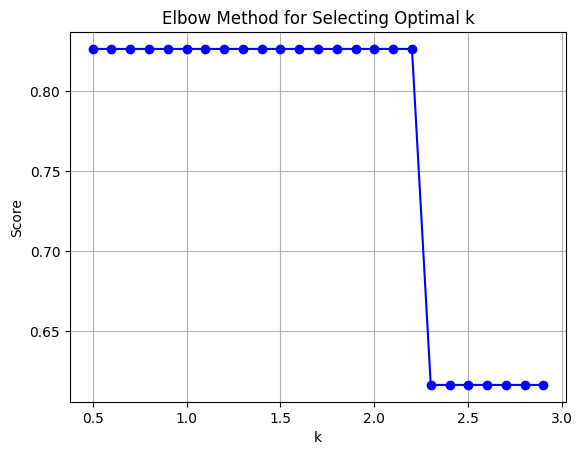

The optimal k according to the elbow method is: 0.5
Combined Similarity Matrix:
 [[0.69999999 0.67261135 0.4469443  0.56713568]
 [0.67261135 0.69999999 0.44910541 0.50963854]
 [0.4469443  0.44910541 0.69999993 0.51476696]
 [0.56713568 0.50963854 0.51476696 0.69999999]]

Threshold: 0.519779106769379

Irrelevant Sentences:
 ['Network security is very important.']


In [ ]:
import numpy as np
from sentence_transformers import SentenceTransformer, util
from transformers import RobertaModel, RobertaTokenizer
import torch
import matplotlib.pyplot as plt

# Sample data
data = [
    "Meanwhile, in the broader field of computer science, data structures such as arrays, linked lists, and trees are fundamental concepts crucial for efficiently organizing and manipulating data.",
    "Every engineer should understand data structures and algorithms.",
    "Network security is very important.",
    "The operating system's kernel acts as an intermediary between the hardware and software, managing system resources and facilitating communication between components.",
]

# ============== Model 1: Sentence-BERT for Semantic Similarity ==============
# Load pre-trained Sentence-BERT model
semantic_model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# Encode the sentences into semantic embeddings
semantic_embeddings = semantic_model.encode(data, convert_to_tensor=True)

# Calculate the semantic similarity matrix using BERT embeddings
semantic_similarity_matrix = util.pytorch_cos_sim(semantic_embeddings, semantic_embeddings).cpu().numpy()


# ============== Model 2: RoBERTa for Contextual Similarity ==============
# Load pre-trained RoBERTa model and tokenizer
contextual_model = RobertaModel.from_pretrained('roberta-base')
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

# Function to get RoBERTa embeddings for contextual similarity
def roberta_embedding(sentences):
    inputs = tokenizer(sentences, return_tensors='pt', padding=True, truncation=True)
    with torch.no_grad():
        outputs = contextual_model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).numpy()  # Average pooling over token embeddings

# Get contextual embeddings for all sentences
contextual_embeddings = [roberta_embedding([sentence])[0] for sentence in data]

# Calculate cosine similarity between contextual embeddings
def cosine_similarity(emb1, emb2):
    return np.dot(emb1, emb2) / (np.linalg.norm(emb1) * np.linalg.norm(emb2))

# Initialize the contextual similarity matrix
contextual_similarity_matrix = np.zeros((len(data), len(data)))

# Compute the contextual similarity matrix
for i in range(len(data)):
    for j in range(len(data)):
        if i != j:
            contextual_similarity_matrix[i, j] = cosine_similarity(contextual_embeddings[i], contextual_embeddings[j])


# ============== Combining Both Similarity Matrices ==============
# Combine both matrices: 50% semantic similarity and 50% contextual similarity
combined_similarity_matrix = 0.7 * semantic_similarity_matrix + 0.3 * contextual_similarity_matrix


# ============== Threshold Calculation and Irrelevant Sentence Detection ==============
# Flatten the combined similarity matrix to calculate mean and standard deviation
similarities = combined_similarity_matrix.flatten()
mean_similarity = np.mean(similarities)
std_similarity = np.std(similarities)

# best_k = None
# best_score = -np.inf

# # Iterate over a range of k values to find the optimal threshold
# for k in np.arange(0.5, 3.0, 0.1):
#     threshold = mean_similarity - k * std_similarity
#     irrelevant_indices = []

#     # Identify irrelevant sentences based on the threshold
#     for i, row in enumerate(combined_similarity_matrix):
#         max_similarity = max(row[j] for j in range(len(row)) if i != j)
#         if max_similarity < threshold:
#             irrelevant_indices.append(i)

#     relevant_indices = set(range(len(data))) - set(irrelevant_indices)

#     if len(relevant_indices) > 0:
#         # Calculate the score as the mean similarity among relevant sentences
#         score = np.mean([np.mean(combined_similarity_matrix[i][list(relevant_indices)]) for i in relevant_indices])
#         if score > best_score:
#             best_score = score
#             best_k = k

# # Optimal k found
# k = best_k
# threshold = mean_similarity - k * std_similarity

k_values = np.arange(0.5, 3.0, 0.1)
scores = []

# Iterate over k values to calculate the score for each
for k in k_values:
    threshold = mean_similarity - k * std_similarity
    irrelevant_indices = []

    # Classify irrelevant sentences
    for i, row in enumerate(similarity_matrix):
        max_similarity = max(row[j] for j in range(len(row)) if i != j)
        if max_similarity < threshold:
            irrelevant_indices.append(i)

    # Compute relevant indices
    relevant_indices = set(range(len(data))) - set(irrelevant_indices)

    if len(relevant_indices) > 0:
        relevant_indices_list = list(relevant_indices)
        relevant_matrix = similarity_matrix[np.ix_(relevant_indices_list, relevant_indices_list)]
        score = np.mean(relevant_matrix)
    else:
        score = 0  # If there are no relevant sentences, set score to 0

    # Store the score for the current k
    scores.append(score)

# ============== Elbow Plot ==============
plt.plot(k_values, scores, marker='o', linestyle='-', color='b')
plt.xlabel('k')
plt.ylabel('Score')
plt.title('Elbow Method for Selecting Optimal k')
plt.grid(True)
plt.show()

# Finding the best k based on the maximum score (optional)
best_k = k_values[np.argmax(scores)]
print(f"The optimal k according to the elbow method is: {best_k}")




k = best_k
threshold = mean_similarity - k * std_similarity



irrelevant_indices = []

# Final loop to identify irrelevant sentences
for i in range(len(combined_similarity_matrix)):
    count = 0
    for j in range(len(combined_similarity_matrix[i])):
        if i != j and combined_similarity_matrix[i][j] <= threshold:
            count += 1

    if len(data) <= 3:
        if count >= (len(combined_similarity_matrix) - 1) / 2:
            irrelevant_indices.append(i)
    else:
        if count > len(combined_similarity_matrix) / 2:
            irrelevant_indices.append(i)

# Extract irrelevant sentences based on the calculated indices
irrelevant_sentences = [data[i] for i in irrelevant_indices]

# Output the results
print("Combined Similarity Matrix:\n", combined_similarity_matrix)
print("\nThreshold:", threshold)
print("\nIrrelevant Sentences:\n", irrelevant_sentences)


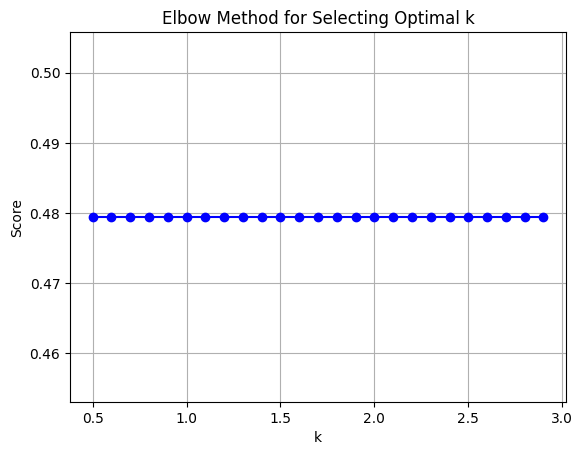

The optimal k according to the elbow method is: 0.5


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data and similarity matrix (replace with your actual data)
data = [
    "Meanwhile, in the broader field of computer science, data structures such as arrays, linked lists, and trees are fundamental concepts crucial for efficiently organizing and manipulating data.",
    "Every engineer should understand data structures and algorithms.",
    "Network security is very important.",
    "The operating system's kernel acts as an intermediary between the hardware and software, managing system resources and facilitating communication between components.",
]

# Placeholder similarity matrix (replace with your actual similarity matrix)
# Assuming the similarity matrix is already computed
similarity_matrix = np.random.random((len(data), len(data)))

# Calculate mean and standard deviation of the similarity matrix
mean_similarity = np.mean(similarity_matrix)
std_similarity = np.std(similarity_matrix)

# Store the values of k and the corresponding scores
k_values = np.arange(0.5, 3.0, 0.1)
scores = []

# Iterate over k values to calculate the score for each
for k in k_values:
    threshold = mean_similarity - k * std_similarity
    irrelevant_indices = []

    # Classify irrelevant sentences
    for i, row in enumerate(similarity_matrix):
        max_similarity = max(row[j] for j in range(len(row)) if i != j)
        if max_similarity < threshold:
            irrelevant_indices.append(i)

    # Compute relevant indices
    relevant_indices = set(range(len(data))) - set(irrelevant_indices)

    if len(relevant_indices) > 0:
        relevant_indices_list = list(relevant_indices)
        relevant_matrix = similarity_matrix[np.ix_(relevant_indices_list, relevant_indices_list)]
        score = np.mean(relevant_matrix)
    else:
        score = 0  # If there are no relevant sentences, set score to 0

    # Store the score for the current k
    scores.append(score)

# ============== Elbow Plot ==============
plt.plot(k_values, scores, marker='o', linestyle='-', color='b')
plt.xlabel('k')
plt.ylabel('Score')
plt.title('Elbow Method for Selecting Optimal k')
plt.grid(True)
plt.show()

# Finding the best k based on the maximum score (optional)
best_k = k_values[np.argmax(scores)]
print(f"The optimal k according to the elbow method is: {best_k}")


In [ ]:
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sentence_transformers import SentenceTransformer, util
from transformers import BertModel, BertTokenizer
import torch

nltk.download('punkt')
nltk.download('stopwords')

# Sample data
data = [
    "Meanwhile, in the broader field of computer science, data structures such as arrays, linked lists, and trees are fundamental concepts crucial for efficiently organizing and manipulating data.",
    "Every engineer should understand data structures and algorithms.",
    "Network security is very important.",
    "The operating system's kernel acts as an intermediary between the hardware and software, managing system resources and facilitating communication between components.",
]

# Preprocess text
def preprocess_text(text):
    text = re.sub(r'\W', ' ', text)
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return ' '.join(tokens)

cleaned_data = [preprocess_text(sentence) for sentence in data]

# Load Sentence Transformer model for contextual embeddings
context_model = SentenceTransformer('all-mpnet-base-v2')

# Load BERT model and tokenizer for additional semantic embeddings
bert_model = BertModel.from_pretrained('bert-base-uncased')
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Function to get semantic embeddings from BERT
def get_semantic_embedding(text):
    inputs = bert_tokenizer(text, return_tensors='pt', truncation=True, padding=True)
    outputs = bert_model(**inputs)
    # Mean pooling over token embeddings
    semantic_embedding = outputs.last_hidden_state.mean(dim=1).detach()
    return semantic_embedding

# Function to combine contextual and semantic embeddings
def get_combined_embedding(text):
    context_embedding = context_model.encode(text, convert_to_tensor=True).unsqueeze(0)
    semantic_embedding = get_semantic_embedding(text)

    # Combine by averaging the embeddings (could be weighted combination)
    combined_embedding = context_embedding
    return combined_embedding.squeeze(0)

# Generate combined embeddings for all sentences
combined_embeddings = torch.stack([get_combined_embedding(sentence) for sentence in cleaned_data])

# Compute similarity matrix using combined embeddings
similarity_matrix = util.pytorch_cos_sim(combined_embeddings, combined_embeddings).cpu().numpy()

# Flatten similarity matrix for threshold calculations
similarities = similarity_matrix.flatten()
mean_similarity = np.mean(similarities)
std_similarity = np.std(similarities)

# Determine the optimal k value using grid search
best_k = None
best_score = -np.inf
k_values = np.arange(0.5, 3.0, 0.1)
for k in k_values:
    threshold = mean_similarity - k * std_similarity
    irrelevant_indices = [i for i, row in enumerate(similarity_matrix) if max(row[j] for j in range(len(row)) if i != j) < threshold]

    # Compute relevant indices by excluding irrelevant ones
    relevant_indices = list(set(range(len(data))) - set(irrelevant_indices))

    if len(relevant_indices) > 0:
        relevant_matrix = similarity_matrix[np.ix_(relevant_indices, relevant_indices)]
        score = np.mean(relevant_matrix)
        if score > best_score:
            best_score = score
            best_k = k

# Final calculation with the optimal k
print(f"Optimal k: {best_k}")
k = best_k
threshold = mean_similarity - k * std_similarity

# Identify irrelevant sentences using the optimal threshold
irrelevant_indices = []
for i in range(len(similarity_matrix)):
    max_similarity = max(similarity_matrix[i][j] for j in range(len(similarity_matrix[i])) if i != j)
    if max_similarity <= threshold:
        irrelevant_indices.append(i)

# Extract irrelevant sentences
irrelevant_sentences = [data[i] for i in irrelevant_indices]

# Output the results
print("Similarity Matrix:\n", similarity_matrix)
print("\nThreshold:", threshold)
print("\nIrrelevant Sentences:\n", irrelevant_sentences)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Optimal k: 0.5
Similarity Matrix:
 [[1.         0.5654466  0.18145284 0.21609539]
 [0.5654466  1.0000001  0.22309378 0.23166706]
 [0.18145284 0.22309378 0.99999994 0.27726156]
 [0.21609539 0.23166706 0.27726156 1.0000001 ]]

Threshold: 0.29670464992523193

Irrelevant Sentences:
 ['Network security is very important.', "The operating system's kernel acts as an intermediary between the hardware and software, managing system resources and facilitating communication between components."]


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Similarity Matrix:
 [[1.         0.5654466  0.18145284 0.21609539]
 [0.5654466  1.0000001  0.22309378 0.23166706]
 [0.18145284 0.22309378 0.99999994 0.27726156]
 [0.21609539 0.23166706 0.27726156 1.0000001 ]]

Threshold: 0.29670464992523193

Irrelevant Sentences:
 ['Network security is very important.', "The operating system's kernel acts as an intermediary between the hardware and software, managing system resources and facilitating communication between components."]


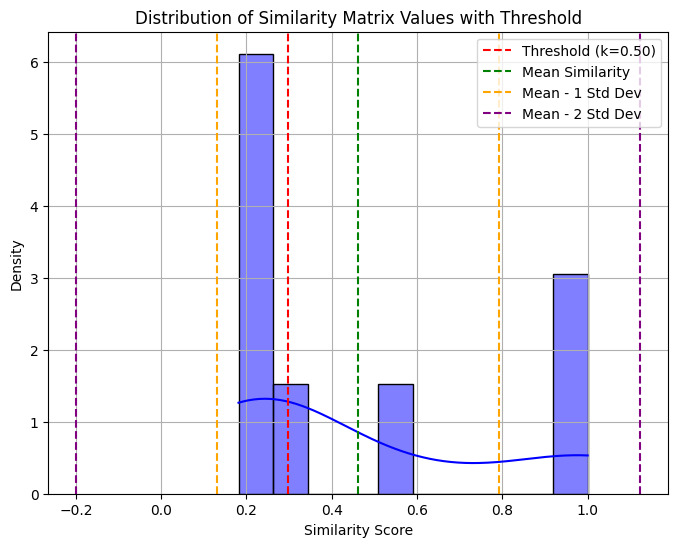

In [ ]:
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sentence_transformers import SentenceTransformer, util
from transformers import BertModel, BertTokenizer
import torch
import matplotlib.pyplot as plt
import seaborn as sns

# Download NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# Sample data
data = [
    "Meanwhile, in the broader field of computer science, data structures such as arrays, linked lists, and trees are fundamental concepts crucial for efficiently organizing and manipulating data.",
    "Every engineer should understand data structures and algorithms.",
    "Network security is very important.",
    "The operating system's kernel acts as an intermediary between the hardware and software, managing system resources and facilitating communication between components.",
]

# Preprocess text
def preprocess_text(text):
    text = re.sub(r'\W', ' ', text)
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return ' '.join(tokens)

cleaned_data = [preprocess_text(sentence) for sentence in data]

# Load Sentence Transformer model for contextual embeddings
context_model = SentenceTransformer('all-mpnet-base-v2')

# Load BERT model and tokenizer for additional semantic embeddings
bert_model = BertModel.from_pretrained('bert-base-uncased')
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Function to get semantic embeddings from BERT
def get_semantic_embedding(text):
    inputs = bert_tokenizer(text, return_tensors='pt', truncation=True, padding=True)
    outputs = bert_model(**inputs)
    # Mean pooling over token embeddings
    semantic_embedding = outputs.last_hidden_state.mean(dim=1).detach()
    return semantic_embedding

# Function to combine contextual and semantic embeddings
def get_combined_embedding(text):
    context_embedding = context_model.encode(text, convert_to_tensor=True).unsqueeze(0)
    semantic_embedding = get_semantic_embedding(text)
    # Combine by averaging the embeddings
    combined_embedding = context_embedding
    return combined_embedding.squeeze(0)

# Generate combined embeddings for all sentences
combined_embeddings = torch.stack([get_combined_embedding(sentence) for sentence in cleaned_data])

# Compute similarity matrix using combined embeddings
similarity_matrix = util.pytorch_cos_sim(combined_embeddings, combined_embeddings).cpu().numpy()

# Flatten similarity matrix for threshold calculations
similarities = similarity_matrix.flatten()
mean_similarity = np.mean(similarities)
std_similarity = np.std(similarities)

# Determine the optimal k value using grid search
best_k = None
best_score = -np.inf
k_values = np.arange(0.5, 3.0, 0.1)

for k in k_values:
    threshold = mean_similarity - k * std_similarity
    irrelevant_indices = [i for i, row in enumerate(similarity_matrix) if max(row[j] for j in range(len(row)) if i != j) < threshold]

    # Compute relevant indices by excluding irrelevant ones
    relevant_indices = list(set(range(len(data))) - set(irrelevant_indices))

    if len(relevant_indices) > 0:
        relevant_matrix = similarity_matrix[np.ix_(relevant_indices, relevant_indices)]
        score = np.mean(relevant_matrix)
        if score > best_score:
            best_score = score
            best_k = k

# Final calculation with the optimal k
threshold = mean_similarity - best_k * std_similarity

# Identify irrelevant sentences using the optimal threshold
irrelevant_indices = []
for i in range(len(similarity_matrix)):
    max_similarity = max(similarity_matrix[i][j] for j in range(len(similarity_matrix[i])) if i != j)
    if max_similarity <= threshold:
        irrelevant_indices.append(i)

# Extract irrelevant sentences
irrelevant_sentences = [data[i] for i in irrelevant_indices]

# Output the results
print("Similarity Matrix:\n", similarity_matrix)
print("\nThreshold:", threshold)
print("\nIrrelevant Sentences:\n", irrelevant_sentences)

# Plot the histogram of the similarity values with a density curve
similarity_values = similarity_matrix.flatten()
plt.figure(figsize=(8, 6))
sns.histplot(similarity_values, kde=True, bins=10, color='blue', stat='density')

# Add vertical lines for threshold, mean, and standard deviations
plt.axvline(threshold, color='red', linestyle='--', label=f'Threshold (k={best_k:.2f})')
plt.axvline(mean_similarity, color='green', linestyle='--', label='Mean Similarity')
plt.axvline(mean_similarity - std_similarity, color='orange', linestyle='--', label='Mean - 1 Std Dev')
plt.axvline(mean_similarity + std_similarity, color='orange', linestyle='--')
plt.axvline(mean_similarity - 2 * std_similarity, color='purple', linestyle='--', label='Mean - 2 Std Dev')
plt.axvline(mean_similarity + 2 * std_similarity, color='purple', linestyle='--')

# Set labels and title
plt.title('Distribution of Similarity Matrix Values with Threshold')
plt.xlabel('Similarity Score')
plt.ylabel('Density')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Similarity Matrix:
 [[1.         0.5654466  0.18145284 0.21609539]
 [0.5654466  1.0000001  0.22309378 0.23166706]
 [0.18145284 0.22309378 0.99999994 0.27726156]
 [0.21609539 0.23166706 0.27726156 1.0000001 ]]

Threshold: 0.29670464992523193

Irrelevant Sentences:
 ['Network security is very important.', "The operating system's kernel acts as an intermediary between the hardware and software, managing system resources and facilitating communication between components."]


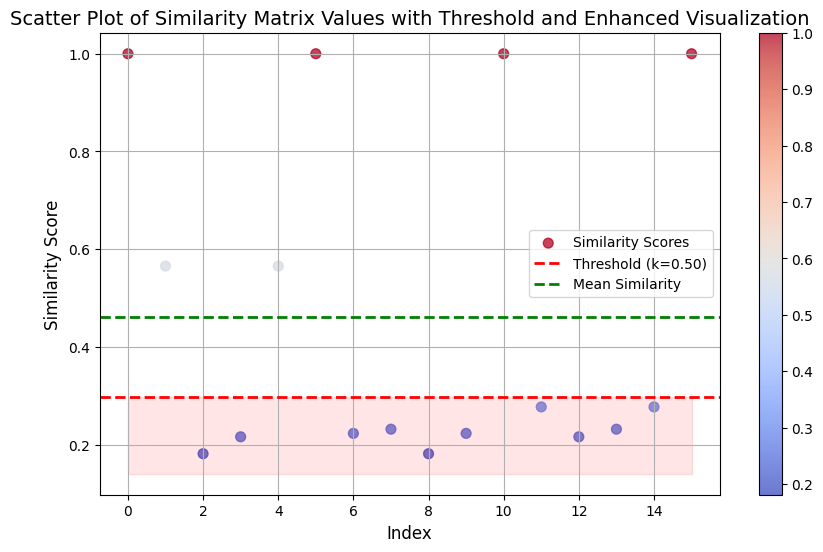

In [ ]:
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sentence_transformers import SentenceTransformer, util
from transformers import BertModel, BertTokenizer
import torch
import matplotlib.pyplot as plt
import seaborn as sns

# Download NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# Sample data
data = [
    "Meanwhile, in the broader field of computer science, data structures such as arrays, linked lists, and trees are fundamental concepts crucial for efficiently organizing and manipulating data.",
    "Every engineer should understand data structures and algorithms.",
    "Network security is very important.",
    "The operating system's kernel acts as an intermediary between the hardware and software, managing system resources and facilitating communication between components.",
]

# Preprocess text
def preprocess_text(text):
    text = re.sub(r'\W', ' ', text)
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return ' '.join(tokens)

cleaned_data = [preprocess_text(sentence) for sentence in data]

# Load Sentence Transformer model for contextual embeddings
context_model = SentenceTransformer('all-mpnet-base-v2')

# Load BERT model and tokenizer for additional semantic embeddings
bert_model = BertModel.from_pretrained('bert-base-uncased')
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Function to get semantic embeddings from BERT
def get_semantic_embedding(text):
    inputs = bert_tokenizer(text, return_tensors='pt', truncation=True, padding=True)
    outputs = bert_model(**inputs)
    # Mean pooling over token embeddings
    semantic_embedding = outputs.last_hidden_state.mean(dim=1).detach()
    return semantic_embedding

# Function to combine contextual and semantic embeddings
def get_combined_embedding(text):
    context_embedding = context_model.encode(text, convert_to_tensor=True).unsqueeze(0)
    semantic_embedding = get_semantic_embedding(text)
    # Combine by averaging the embeddings
    combined_embedding = context_embedding
    return combined_embedding.squeeze(0)

# Generate combined embeddings for all sentences
combined_embeddings = torch.stack([get_combined_embedding(sentence) for sentence in cleaned_data])

# Compute similarity matrix using combined embeddings
similarity_matrix = util.pytorch_cos_sim(combined_embeddings, combined_embeddings).cpu().numpy()

# Flatten similarity matrix for threshold calculations
similarities = similarity_matrix.flatten()
mean_similarity = np.mean(similarities)
std_similarity = np.std(similarities)

# Determine the optimal k value using grid search
best_k = None
best_score = -np.inf
k_values = np.arange(0.5, 3.0, 0.1)

for k in k_values:
    threshold = mean_similarity - k * std_similarity
    irrelevant_indices = [i for i, row in enumerate(similarity_matrix) if max(row[j] for j in range(len(row)) if i != j) < threshold]

    # Compute relevant indices by excluding irrelevant ones
    relevant_indices = list(set(range(len(data))) - set(irrelevant_indices))

    if len(relevant_indices) > 0:
        relevant_matrix = similarity_matrix[np.ix_(relevant_indices, relevant_indices)]
        score = np.mean(relevant_matrix)
        if score > best_score:
            best_score = score
            best_k = k

# Final calculation with the optimal k
threshold = mean_similarity - best_k * std_similarity

# Identify irrelevant sentences using the optimal threshold
irrelevant_indices = []
for i in range(len(similarity_matrix)):
    max_similarity = max(similarity_matrix[i][j] for j in range(len(similarity_matrix[i])) if i != j)
    if max_similarity <= threshold:
        irrelevant_indices.append(i)

irrelevant_sentences = [data[i] for i in irrelevant_indices]

print("Similarity Matrix:\n", similarity_matrix)
print("\nThreshold:", threshold)
print("\nIrrelevant Sentences:\n", irrelevant_sentences)

similarity_values = similarity_matrix.flatten()
plt.figure(figsize=(10, 6))

x_vals = np.arange(len(similarity_values))

scatter = plt.scatter(x_vals, similarity_values, c=similarity_values, cmap='coolwarm', s=50, alpha=0.75, label='Similarity Scores')

plt.colorbar(scatter)

plt.axhline(threshold, color='red', linestyle='--', label=f'Threshold (k={best_k:.2f})', linewidth=2)

plt.axhline(mean_similarity, color='green', linestyle='--', label='Mean Similarity', linewidth=2)

plt.fill_between(x_vals, plt.ylim()[0], threshold, color='red', alpha=0.1)

plt.title('Scatter Plot of Similarity Matrix Values with Threshold and Enhanced Visualization', fontsize=14)
plt.xlabel('Index', fontsize=12)
plt.ylabel('Similarity Score', fontsize=12)
plt.legend()
plt.grid(True)

plt.show()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Similarity Matrix:
 [[1.         0.5654466  0.18145284 0.21609539]
 [0.5654466  1.0000001  0.22309378 0.23166706]
 [0.18145284 0.22309378 0.99999994 0.27726156]
 [0.21609539 0.23166706 0.27726156 1.0000001 ]]

Threshold: 0.29670464992523193

Irrelevant Sentences:
 ['Network security is very important.', "The operating system's kernel acts as an intermediary between the hardware and software, managing system resources and facilitating communication between components."]


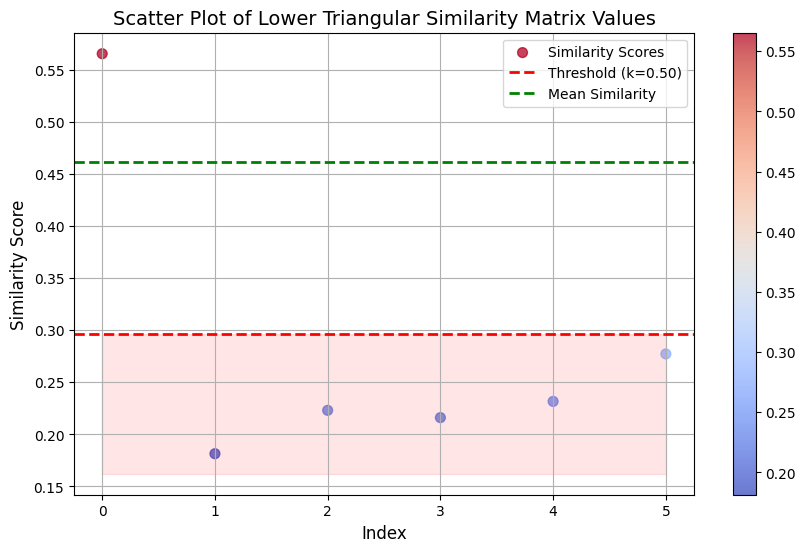

In [ ]:
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sentence_transformers import SentenceTransformer, util
from transformers import BertModel, BertTokenizer
import torch
import matplotlib.pyplot as plt
import seaborn as sns

nltk.download('punkt')
nltk.download('stopwords')

data = [
    '''Meanwhile, in the broader field of computer science, data structures such as arrays,
    linked lists, and trees are fundamental concepts
    crucial for efficiently organizing and manipulating data.''',
    "Every engineer should understand data structures and algorithms.",
    "Network security is very important.",
    '''The operating system's kernel acts as an intermediary between the hardware and software,
    managing system resources and facilitating communication between components.''',
]

def preprocess_text(text):
    text = re.sub(r'\W', ' ', text)
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return ' '.join(tokens)

cleaned_data = [preprocess_text(sentence) for sentence in data]

context_model = SentenceTransformer('all-mpnet-base-v2')

bert_model = BertModel.from_pretrained('bert-base-uncased')
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

def get_semantic_embedding(text):
    inputs = bert_tokenizer(text, return_tensors='pt', truncation=True, padding=True)
    outputs = bert_model(**inputs)
    semantic_embedding = outputs.last_hidden_state.mean(dim=1).detach()
    return semantic_embedding

def get_combined_embedding(text):
    context_embedding = context_model.encode(text, convert_to_tensor=True).unsqueeze(0)
    semantic_embedding = get_semantic_embedding(text)
    combined_embedding = context_embedding
    return combined_embedding.squeeze(0)

combined_embeddings = torch.stack([get_combined_embedding(sentence) for sentence in cleaned_data])

similarity_matrix = util.pytorch_cos_sim(combined_embeddings, combined_embeddings).cpu().numpy()

similarities = similarity_matrix.flatten()
mean_similarity = np.mean(similarities)
std_similarity = np.std(similarities)

best_k = None
best_score = -np.inf
k_values = np.arange(0.5, 3.0, 0.1)

for k in k_values:
    threshold = mean_similarity - k * std_similarity
    irrelevant_indices = [i for i, row in enumerate(similarity_matrix) if max(row[j] for j in range(len(row)) if i != j) < threshold]

    relevant_indices = list(set(range(len(data))) - set(irrelevant_indices))

    if len(relevant_indices) > 0:
        relevant_matrix = similarity_matrix[np.ix_(relevant_indices, relevant_indices)]
        score = np.mean(relevant_matrix)
        if score > best_score:
            best_score = score
            best_k = k

threshold = mean_similarity - best_k * std_similarity

irrelevant_indices = []
for i in range(len(similarity_matrix)):
    max_similarity = max(similarity_matrix[i][j] for j in range(len(similarity_matrix[i])) if i != j)
    if max_similarity <= threshold:
        irrelevant_indices.append(i)

irrelevant_sentences = [data[i] for i in irrelevant_indices]

print("Similarity Matrix:\n", similarity_matrix)
print("\nThreshold:", threshold)
print("\nIrrelevant Sentences:\n", irrelevant_sentences)

plt.figure(figsize=(10, 6))

lower_triangular_indices = np.tril_indices_from(similarity_matrix, k=-1)
similarity_values = similarity_matrix[lower_triangular_indices]

x_vals = np.arange(len(similarity_values))

scatter = plt.scatter(x_vals, similarity_values, c=similarity_values, cmap='coolwarm', s=50, alpha=0.75, label='Similarity Scores')

plt.colorbar(scatter)
plt.axhline(threshold, color='red', linestyle='--', label=f'Threshold (k={best_k:.2f})', linewidth=2)
plt.axhline(mean_similarity, color='green', linestyle='--', label='Mean Similarity', linewidth=2)
plt.fill_between(x_vals, plt.ylim()[0], threshold, color='red', alpha=0.1)

plt.title('Scatter Plot of Lower Triangular Similarity Matrix Values', fontsize=14)
plt.xlabel('Index', fontsize=12)
plt.ylabel('Similarity Score', fontsize=12)
plt.legend()
plt.grid(True)

plt.show()


In [ ]:
!pip install sentence_transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.3/245.3 kB 3.7 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Similarity Matrix:
 [[1.         0.5654466  0.18145284 0.21609539]
 [0.5654466  1.0000001  0.22309378 0.23166706]
 [0.18145284 0.22309378 0.99999994 0.27726156]
 [0.21609539 0.23166706 0.27726156 1.0000001 ]]

Threshold: 0.21768921613693237

Irrelevant Sentences:
 []


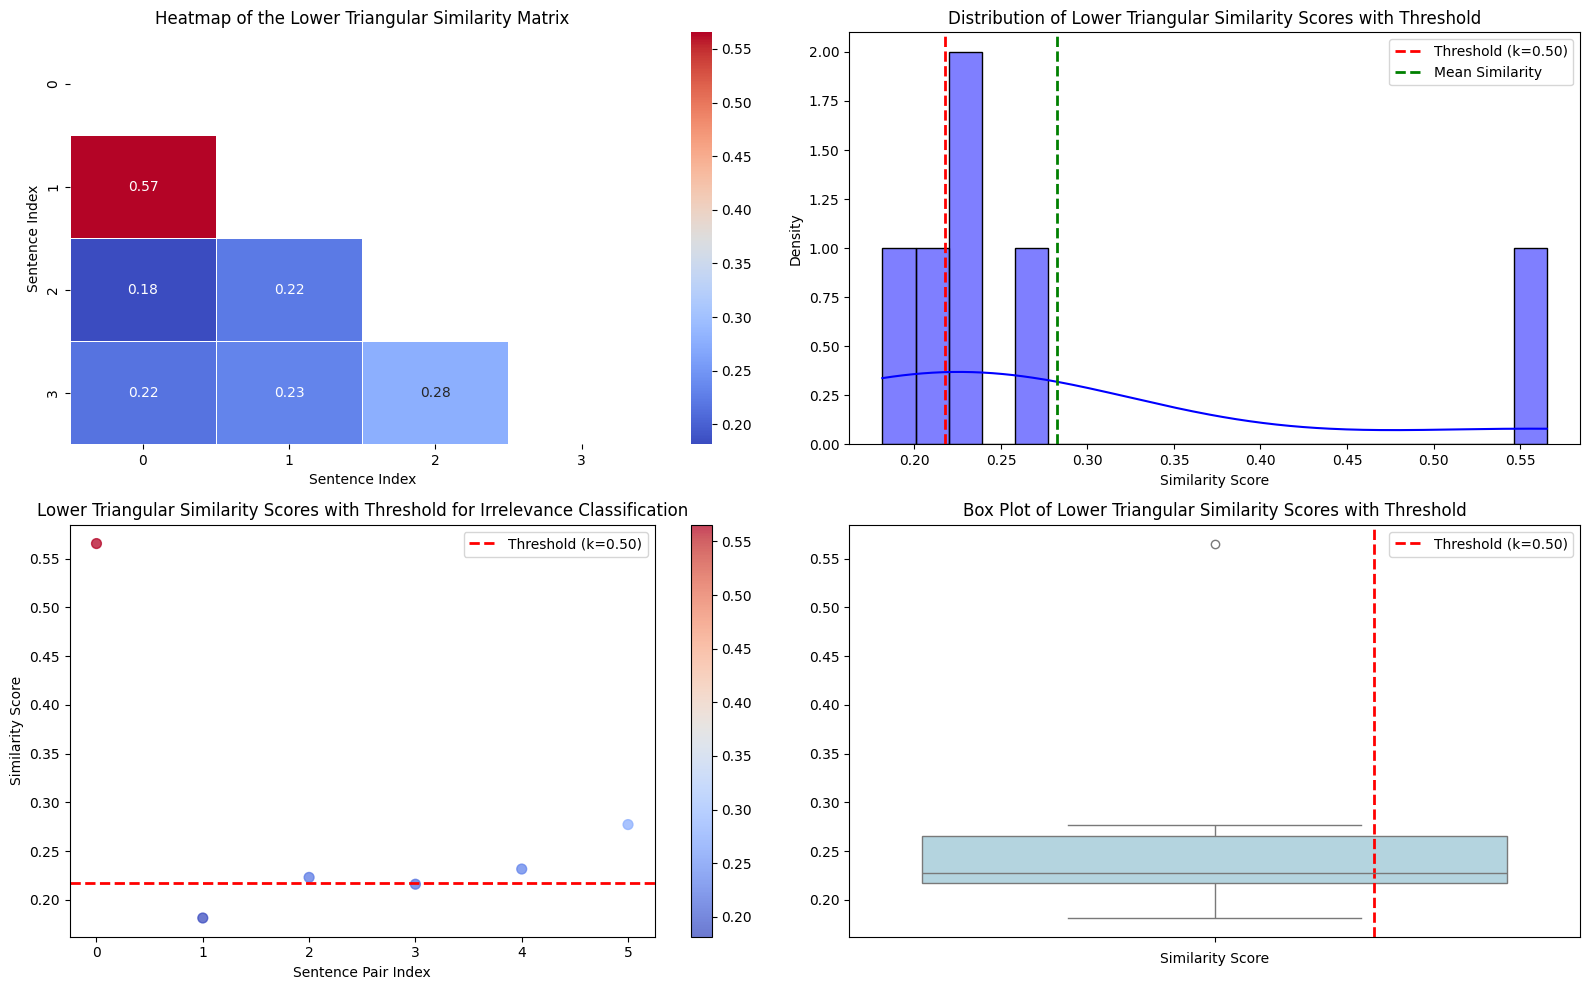

In [ ]:
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sentence_transformers import SentenceTransformer, util
from transformers import BertModel, BertTokenizer
import torch
import matplotlib.pyplot as plt
import seaborn as sns

nltk.download('punkt')
nltk.download('stopwords')

data = [
    "Meanwhile, in the broader field of computer science, data structures such as arrays, linked lists, and trees are fundamental concepts crucial for efficiently organizing and manipulating data.",
    "Every engineer should understand data structures and algorithms.",
    "Network security is very important.",
    "The operating system's kernel acts as an intermediary between the hardware and software, managing system resources and facilitating communication between components.",
    # "function LongestSubarrayWithSumGreaterThanSix(A, n):",
    # "max_len = 0",
    # "current_sum = 0",
    # "Dogs are cute",
    # "start = 0",
    # # "We loop through the numbers to get the correct value for our case",
    # "// for end = 0 to n - 1 do"

    # "function findMax(a, b):",
    """if a > b then
      return a""",
    """else
       return b""",
    """findMax(a, b)""",
    """findMin(a, b)"""


]

def preprocess_text(text):
    text = re.sub(r'\W', ' ', text)
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return ' '.join(tokens)

cleaned_data = [preprocess_text(sentence) for sentence in data]

context_model = SentenceTransformer('all-mpnet-base-v2')

bert_model = BertModel.from_pretrained('bert-base-uncased')
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

def get_semantic_embedding(text):
    inputs = bert_tokenizer(text, return_tensors='pt', truncation=True, padding=True)
    outputs = bert_model(**inputs)
    semantic_embedding = outputs.last_hidden_state.mean(dim=1).detach()
    return semantic_embedding

def get_combined_embedding(text):
    context_embedding = context_model.encode(text, convert_to_tensor=True).unsqueeze(0)
    semantic_embedding = get_semantic_embedding(text)
    combined_embedding = context_embedding
    return combined_embedding.squeeze(0)

combined_embeddings = torch.stack([get_combined_embedding(sentence) for sentence in cleaned_data])

similarity_matrix = util.pytorch_cos_sim(combined_embeddings, combined_embeddings).cpu().numpy()

similarities = similarity_matrix.flatten()
mean_similarity = np.mean(similarities)
std_similarity = np.std(similarities)

best_k = None
best_score = -np.inf
k_values = np.arange(0.5, 3.0, 0.1)

for k in k_values:
    threshold = mean_similarity - k * std_similarity
    irrelevant_indices = [i for i, row in enumerate(similarity_matrix) if max(row[j] for j in range(len(row)) if i != j) < threshold]

    relevant_indices = list(set(range(len(data))) - set(irrelevant_indices))

    if len(relevant_indices) > 0:
        relevant_matrix = similarity_matrix[np.ix_(relevant_indices, relevant_indices)]
        score = np.mean(relevant_matrix)
        if score > best_score:
            best_score = score
            best_k = k

threshold = mean_similarity - best_k * std_similarity
print("k-value is : ", k)
irrelevant_indices = []
for i in range(len(similarity_matrix)):
    max_similarity = max(similarity_matrix[i][j] for j in range(len(similarity_matrix[i])) if i != j)
    if max_similarity <= threshold:
        irrelevant_indices.append(i)

irrelevant_sentences = [data[i] for i in irrelevant_indices]
lower_traingula_matrix = np.tril(similarity_matrix)
print("Similarity Matrix:\n", similarity_matrix)
print("\nThreshold:", threshold)
print("\nIrrelevant Sentences:\n", irrelevant_sentences)

x_vals = np.arange(len(similarities))

# 1. Heatmap of the similarity matrix
plt.figure(figsize=(16, 10))

plt.subplot(2, 2, 1)
sns.heatmap(similarity_matrix, annot=True, cmap='coolwarm', cbar=True, linewidths=.5)
plt.title("Heatmap of the Sentence Similarity Matrix")
plt.xlabel("Sentence Index")
plt.ylabel("Sentence Index")

# 2. Distribution of similarity scores
plt.subplot(2, 2, 2)
sns.histplot(similarities, bins=20, kde=True, color='blue')
plt.axvline(threshold, color='red', linestyle='--', label=f'Threshold (k={best_k:.2f})', linewidth=2)
plt.axvline(mean_similarity, color='green', linestyle='--', label='Mean Similarity', linewidth=2)
plt.title('Distribution of Similarity Scores with Threshold')
plt.xlabel('Similarity Score')
plt.ylabel('Density')
plt.legend()

# 3. Scatter plot of similarity scores
plt.subplot(2, 2, 3)
scatter = plt.scatter(x_vals, similarities, c=similarities, cmap='coolwarm', s=50, alpha=0.75)
plt.axhline(threshold, color='red', linestyle='--', label=f'Threshold (k={best_k:.2f})', linewidth=2)
plt.colorbar(scatter)
plt.title('Similarity Scores with Threshold for Irrelevance Classification')
plt.xlabel('Sentence Pair Index')
plt.ylabel('Similarity Score')
plt.legend()

# 4. Box plot of similarity scores
plt.subplot(2, 2, 4)
sns.boxplot(similarities, color='lightblue')
plt.axvline(threshold, color='red', linestyle='--', label=f'Threshold (k={best_k:.2f})', linewidth=2)
plt.title('Box Plot of Similarity Scores with Threshold')
plt.xlabel('Similarity Score')
plt.legend()

plt.tight_layout()
plt.show()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


k-value is :  2.8999999999999995
Similarity Matrix:
 [[1.0000002  0.6302211  0.3884859 ]
 [0.63022107 1.         0.40179777]
 [0.3884859  0.40179777 1.0000001 ]]

Threshold: 0.516896203160286

Irrelevant Sentences:
 ['findMax(a, b)']


In [ ]:
=!pip install sentence_transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.3/245.3 kB 3.8 MB/s eta 0:00:00


In [ ]:
# !pip install scikit-learn
!pip install sklearn

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sentence_transformers import SentenceTransformer, util
from transformers import BertModel, BertTokenizer
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering



nltk.download('punkt')
nltk.download('stopwords')

data = [
    # "Meanwhile, in the broader field of computer science, data structures such as arrays, linked lists, and trees are fundamental concepts crucial for efficiently organizing and manipulating data.",
    # "Every engineer should understand data structures and algorithms.",
    # "Network security is very important.",
    # "The operating system's kernel acts as an intermediary between the hardware and software, managing system resources and facilitating communication between components.",
    # "function LongestSubarrayWithSumGreaterThanSix(A, n):",
    # "max_len = 0",
    # "current_sum = 0",
    # "Dogs are cute",
    # "start = 0",
    # # "We loop through the numbers to get the correct value for our case",
    # "// for end = 0 to n - 1 do"

    "function findMax(a, b):",
    "if a > b then",
    "return a",
    "else",
    "return b",
    # "findMax(a, b)",
    # "findMin(a, b)"
]

def preprocess_text(text):
    text = re.sub(r'\W', ' ', text)
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return ' '.join(tokens)

cleaned_data = [preprocess_text(sentence) for sentence in data]

context_model = SentenceTransformer('all-mpnet-base-v2')

bert_model = BertModel.from_pretrained('bert-base-uncased')
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

def get_semantic_embedding(text):
    inputs = bert_tokenizer(text, return_tensors='pt', truncation=True, padding=True)
    outputs = bert_model(**inputs)
    semantic_embedding = outputs.last_hidden_state.mean(dim=1).detach()
    return semantic_embedding

def get_combined_embedding(text):
    context_embedding = context_model.encode(text, convert_to_tensor=True).unsqueeze(0)
    semantic_embedding = get_semantic_embedding(text)
    combined_embedding = context_embedding
    return combined_embedding.squeeze(0)

combined_embeddings = torch.stack([get_combined_embedding(sentence) for sentence in cleaned_data])

print(len(combined_embeddings))

# kmeans = KMeans(n_clusters = 2, random_state = 0, n_init='auto')
# kmeans.fit(combined_embeddings)

ac3 = AgglomerativeClustering(n_clusters = 2)
ac3.fit(combined_embeddings)
# print(kmeans.cluster_centers_)
# plt.(kmeans.cluster_centres_)

cluster_labels = ac3.labels_

clustered_sentences = {i: [] for i in range(ac3.n_clusters)}

for idx, label in enumerate(cluster_labels):
    clustered_sentences[label].append(data[idx])

for cluster, sentences in clustered_sentences.items():
    print(f"Cluster {cluster}:")
    for sentence in sentences:
        print(f" - {sentence}")
    print("\n")


# similarity_matrix = util.pytorch_cos_sim(combined_embeddings, combined_embeddings).cpu().numpy()

# similarities = similarity_matrix.flatten()
# print(similarities)


# mean_similarity = np.mean(similarities)
# std_similarity = np.std(similarities)

# best_k = None
# best_score = -np.inf
# k_values = np.arange(0.5, 3.0, 0.1)

# for k in k_values:
#     threshold = mean_similarity - k * std_similarity
#     irrelevant_indices = [i for i, row in enumerate(similarity_matrix) if max(row[j] for j in range(len(row)) if i != j) < threshold]

#     relevant_indices = list(set(range(len(data))) - set(irrelevant_indices))

#     if len(relevant_indices) > 0:
#         relevant_matrix = similarity_matrix[np.ix_(relevant_indices, relevant_indices)]
#         score = np.mean(relevant_matrix)
#         if score > best_score:
#             best_score = score
#             best_k = k

# threshold = mean_similarity - best_k * std_similarity
# print("k-value is : ", k)
# irrelevant_indices = []
# for i in range(len(similarity_matrix)):
#     max_similarity = max(similarity_matrix[i][j] for j in range(len(similarity_matrix[i])) if i != j)
#     if max_similarity <= threshold:
#         irrelevant_indices.append(i)

# irrelevant_sentences = [data[i] for i in irrelevant_indices]
# lower_traingula_matrix = np.tril(similarity_matrix)
# print("Similarity Matrix:\n", similarity_matrix)
# print("\nThreshold:", threshold)
# print("\nIrrelevant Sentences:\n", irrelevant_sentences)



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


5
Cluster 0:
 - function findMax(a, b):
 - if a > b then
 - return a
 - return b


Cluster 1:
 - else


